<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/LAB2_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 2 - INTELIGENCIA DE NEGOCIOS**

Santiago Pardo - 202013025



Luis Plazas - 202013155




Felipe Rueda - 202010903



## DESCRIPCIÓN DEL PROBLEMA

### CONTEXTO

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un alto número de muertes por cáncer aunque no haya registros completos u oficiales.



Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

### DICCIONARIO DE DATOS



A continuación se da una descripción detallada de los datos en crudo mediante un diccionario de datos:

| **Atributo** | **Descripción** |
|---|---|
| deathRate | Muertes promedio de cáncer por cada 100.000 habitantes |
| avgAnnCount | Número promedio de casos diagnosticados de cáncer reportados anualmente |
| avgDeathsPerYear | Número promedio de muertes reportadas por cáncer |
| incidenceRate | Número de diagnósticos promedio de cáncer por cada 100.000 habitantes. |
| medianIncome | Ingreso mediano por condado |
| poEst2015 | Población del condado |
| povertyPercent | Porcentaje de la población en la pobreza |
| studyPerCap | Número de ensayos clínicos relacionados con el cáncer por condado |
| binedInc | Ingreso mediano per capita (clasificado por decil) |
| MedianAge | Edad mediana de los residentes del condado |
| MedianAgeMale | Edad mediana de los residentes de sexo masculino del condado |
| MedianAgeFemale | Edad mediana de los residentes de sexo femenino del condado |
| Geography | Nombre del condado |
| AvgHouseholdSize | Número mediano de integrantes de una familia del condado |
| PercentMarried | Porcentaje de residentes del condado que están casados |
| PctNoHS18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo mayor   nivel educativo es menor a escuela primaria (sin terminar) |
| PctHS18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo nivel   educativo es escuela primaria |
| PctSomeCol18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo nivel   educativo es escuela secundaria |
| PctBachDeg18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo nivel   educativo es pregrado |
| PctHS25_Over | Porcentaje de residentes del condado de edad igual o mayor a 25 cuyo   nivel educativo es escuela primaria |
| PctBachDeg25_Over | Porcentaje de residentes del condado de edad igual o mayor a 25 cuyo   nivel educativo es pregrado |
| PctEmployed16_Over | Porcentaje de residentes del condado de edades mayores a 16 que tienen   empleo |
| PctUnemployed16_Over | Porcentaje de residentes del condado de edades mayores a 16 que están   desemplados |
| PctPrivateCoverage | Porcentaje de residentes del condado con cobertura de salud privada |
| PctPrivateCoverageAlone | Porcentaje de residentes del condado con covertura de salud únicamente   (sin financiación pública) |
| PctEmpPrivCoverage | Porcentaje de residentes del condado con cobertura de salud privada   cubierta por el empelador. |
| PctPublicCoverage | Porcentaje de residentes del condado con cobertura de salud privada   cubierta por el empelador. |
| PctPublicCoverageAlone | Porcentaje de residentes del condado con cobertura de salud cubierta por   el gobierno |
| PctWhite | Porcentaje de residentes del condado que se identifican como blancos |
| PctBlack | Porcentaje de residentes del condado que se identifican como negros |
| PctAsian | Porcenaje de residentes del condado que se identifican como asiáticos. |
| PctOtherRace | Porcentaje de residentes del condado que no se identifican como blancos,   negros o asiáticos. |
| PctMarriedHouseholds | Porcentaje de matrimonios. |
| BirthRate | Número de nacimientos vivos relativo al número de mujeres del condado |



## ENTENDIMIENTO DE LOS DATOS

En esta fase, resulta crucial determinar si los datos disponibles son suficientes para abordar el alcance del proyecto. En caso afirmativo, es fundamental comprender sus características para establecer la ruta de limpieza y preparación necesaria para alcanzar los objetivos del proyecto.

Específicamente, se recomienda realizar un **perfilamiento de datos**, que incluye estadísticas descriptivas y gráficos, resaltando los principales indicadores. Dado que el objetivo es construir un modelo de regresión, nos enfocaremos exclusivamente en las variables numéricas. Es importante tener presente que esta etapa se centra en la calidad de los datos, especialmente en las dimensiones de completitud, unicidad, consistencia y validez. Esto nos permitirá identificar las actividades de preparación necesarias para trabajar con los datos de manera efectiva.

In [285]:
import numpy as np
import pandas as pd
#import ydata_profiling
import matplotlib.pyplot as plt
import joblib
from joblib import dump, load

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import scipy.stats as stats
#Lectura de Datos
#Entrenamiento
#Luis
#df_train = pd.read_csv("/202410_Laboratorio 2 - Regresión_train_data.csv",sep=',')
#df_test = pd.read_csv("/202410_Laboratorio 2 - Regresión_val_data.csv",sep=',')
#Santiago
df_train = pd.read_csv("202410_Laboratorio 2 - Regresión_train_data.csv",sep=',')
df_test = pd.read_csv("202410_Laboratorio 2 - Regresión_val_data.csv",sep=',')
#Felipe
#df_train = pd.read_csv("202410_Laboratorio 2 - Regresión_train_data.csv",sep=',')
#df_test = pd.read_csv("202410_Laboratorio 2 - Regresión_val_data.csv",sep=',')
#Prueba
#Luis
#Santiago
#Felipe

In [286]:
#Datos sin la columna objetivo (para realizar el análisis)
df_train_x = df_train.drop('deathRate',axis=1)

In [287]:
#Si lo van a ejecutar, descomentar y ejecutarlo una sola vez porque se demora mucho en producir el informe (6 minutos)
#profiling = ydata_profiling.ProfileReport(df_train_x)
#profiling.to_file('lab2_report.html')

### Resumen General

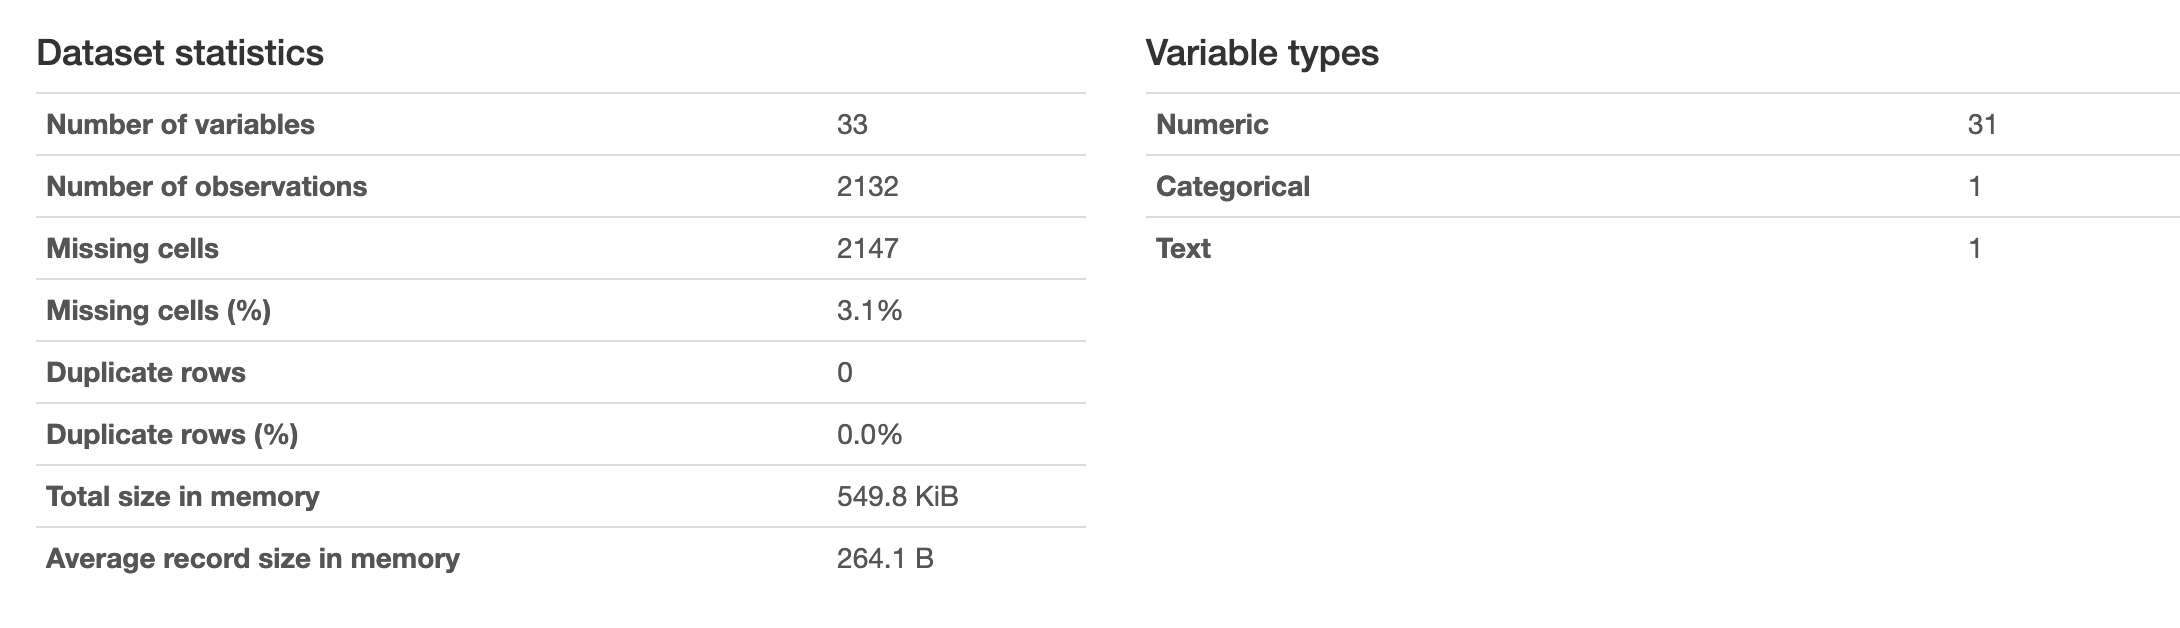

En general, se realizó el análisis en el conjunto de datos de entrenamiento, se hará el entrenamiento del modelo cuyos datos en crudo tienen una dimensionalidad de 33. En total, los datos de entrenamiento son 2132

Por otro lado, los datos contienen 31 datos categóricos, 1 dato categórico y un tipo de texto.

Así mismo, los datos contienen un 3.1% de datos nulos, por lo que es necesario tener en cuenta esta limpieza para dicho conjunto de datos y no contiene ningún tipo de datos duplicados.



#### Análisis de Atributos

Ahora, se presentará un reporte general de todos los atributos, en términos de su distribución en caso de que sea una variable numérica, su número de variabilidad, el número de datos nulos y ceros que contiene cada atributo, y otros aspectos como su valor máximo, mínimo y frecuencia de datos en caso de que los datos sean categóricos

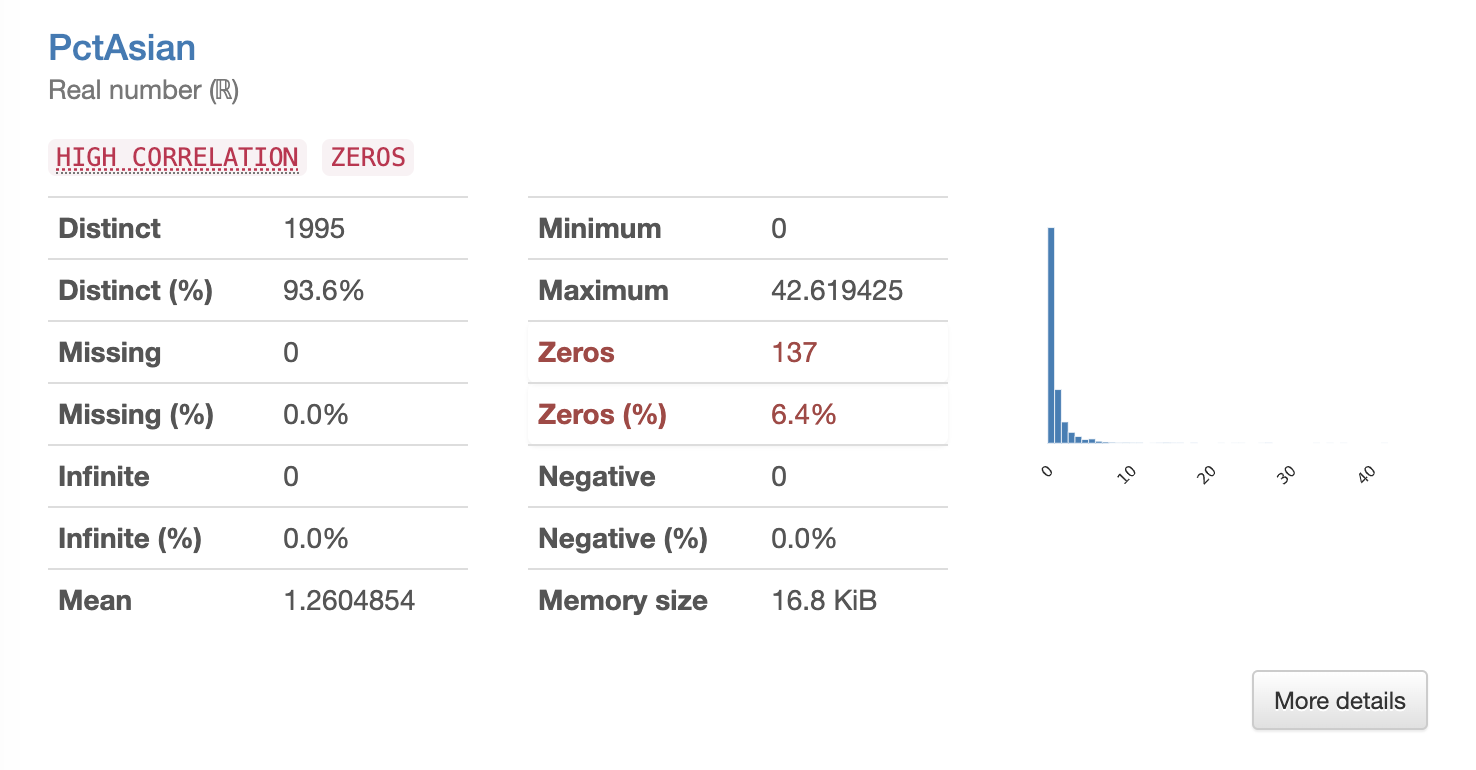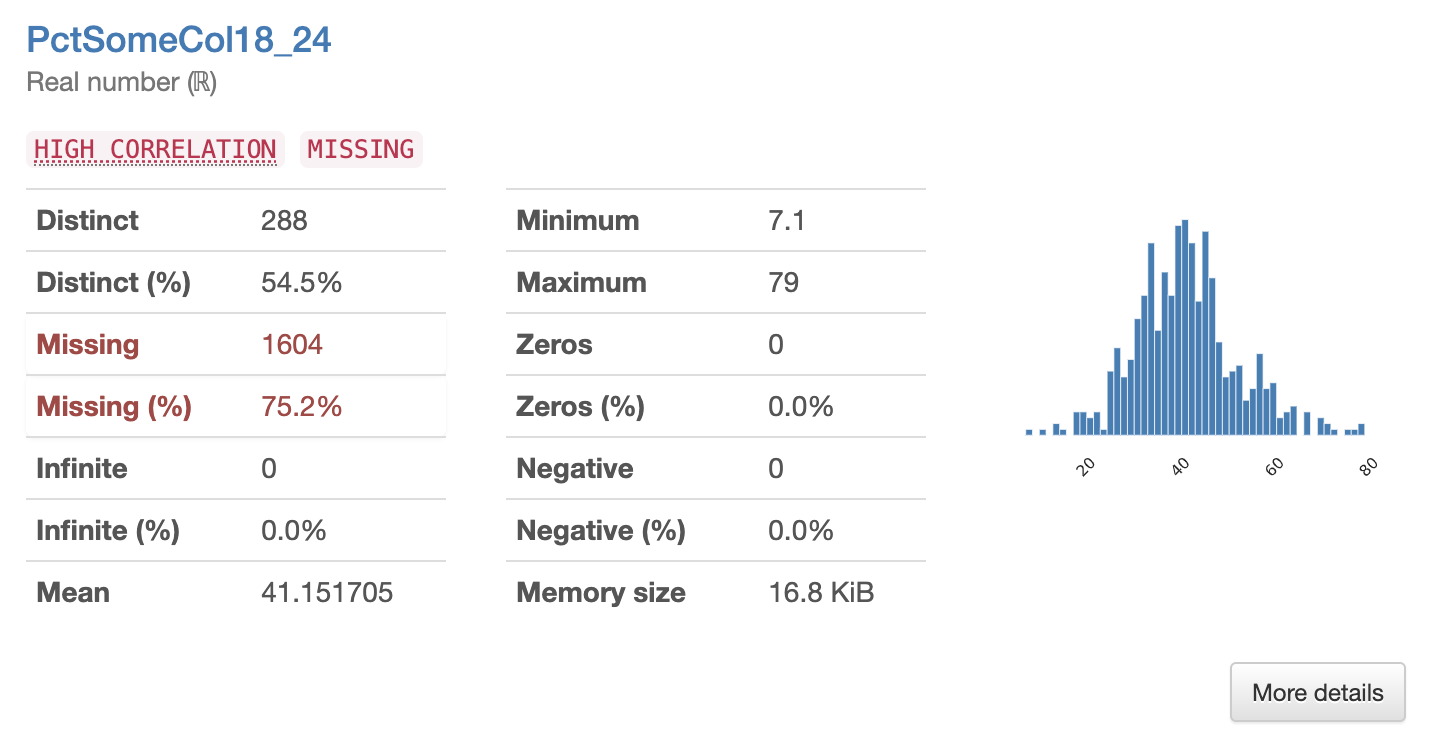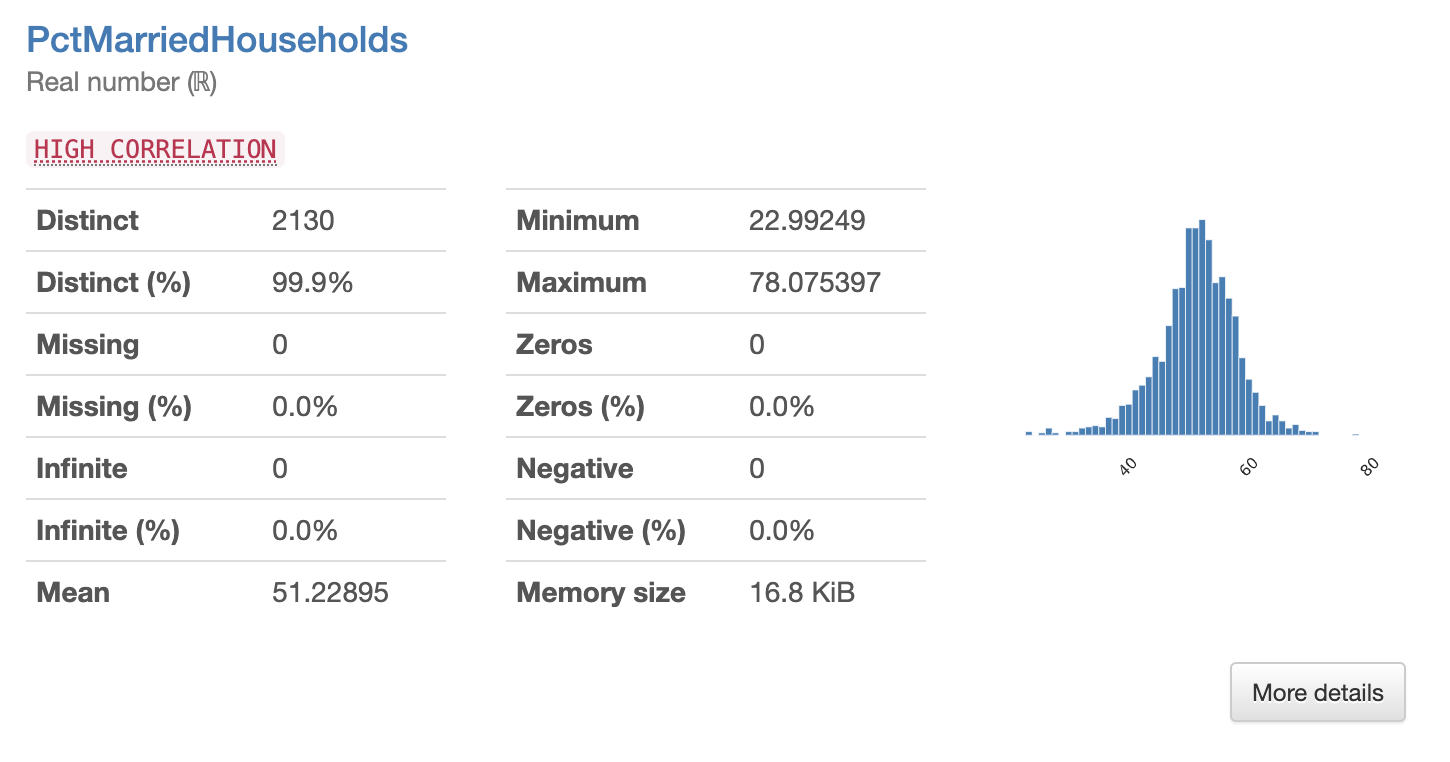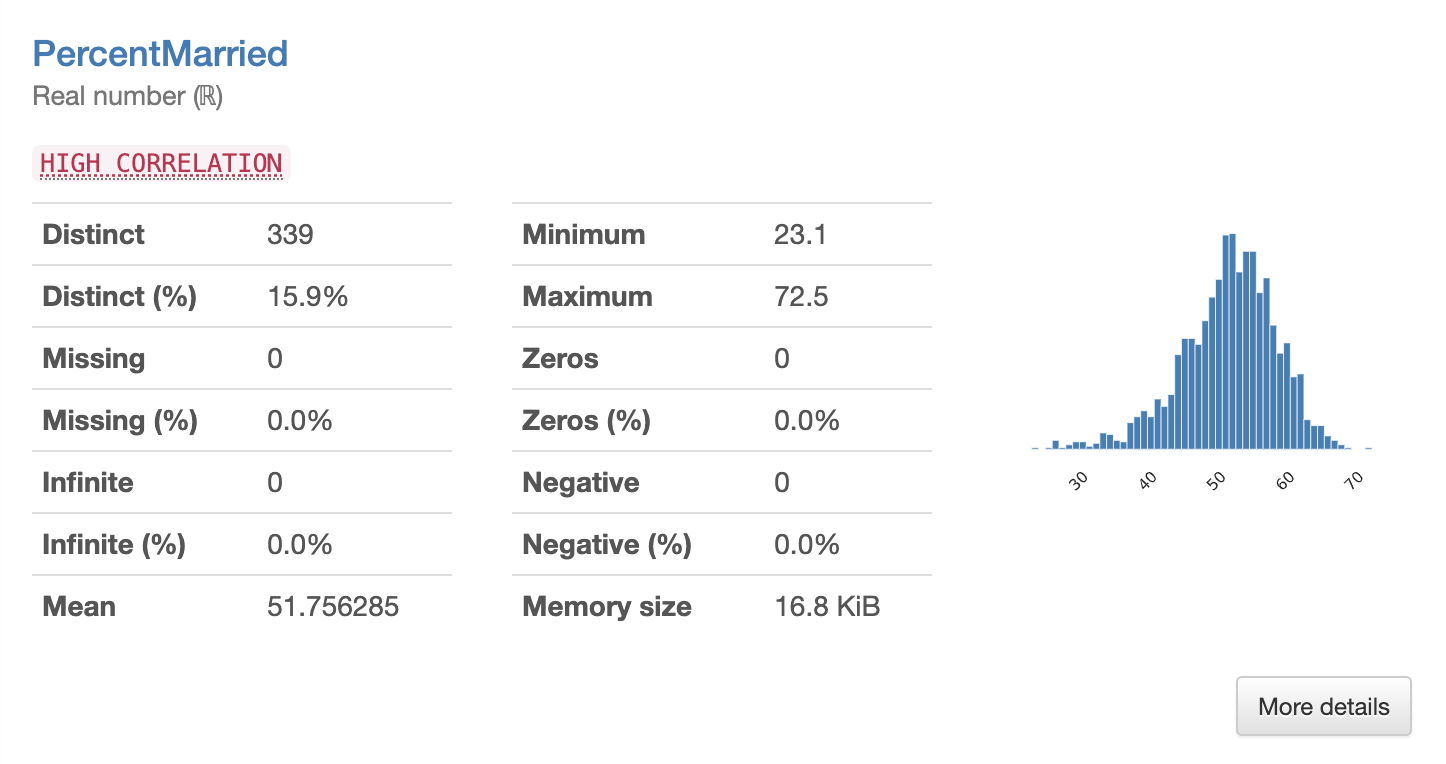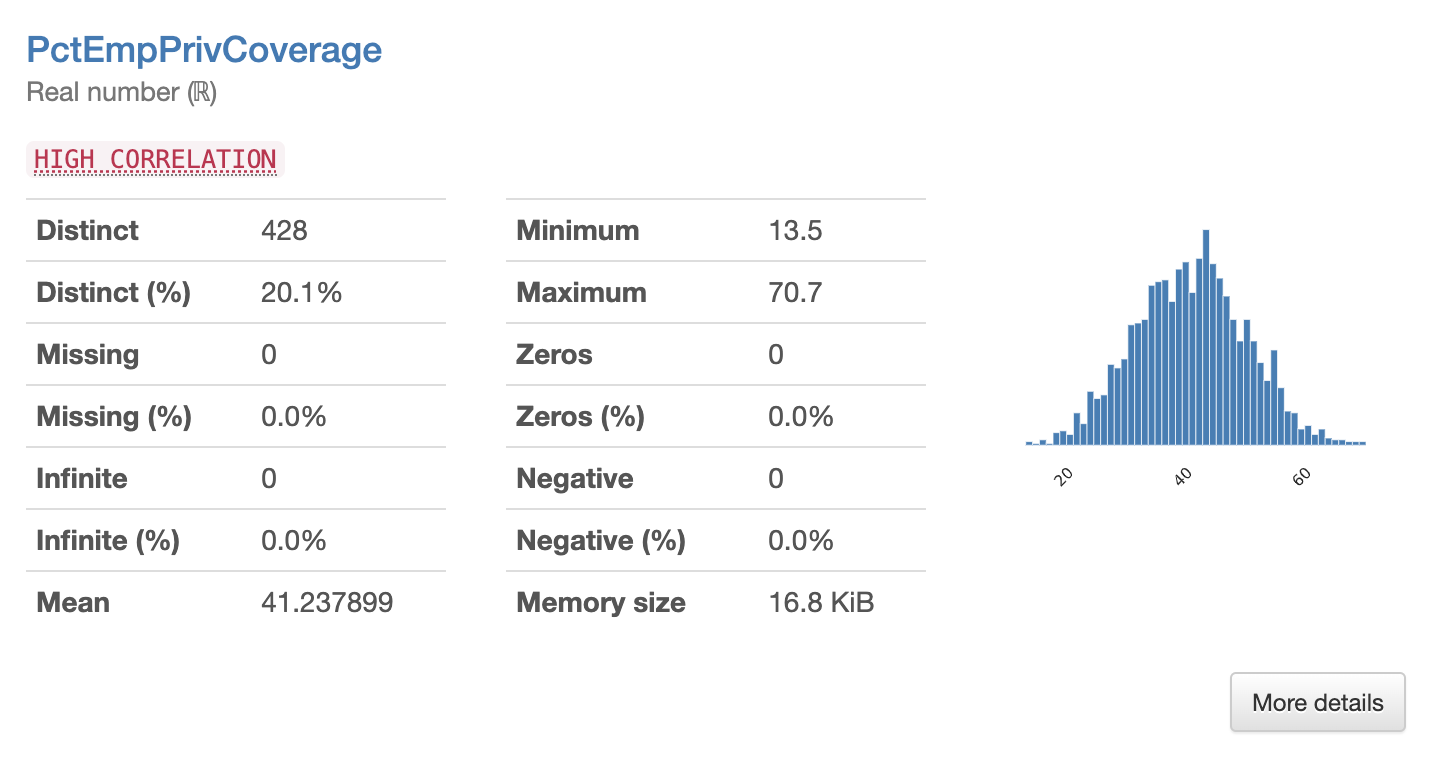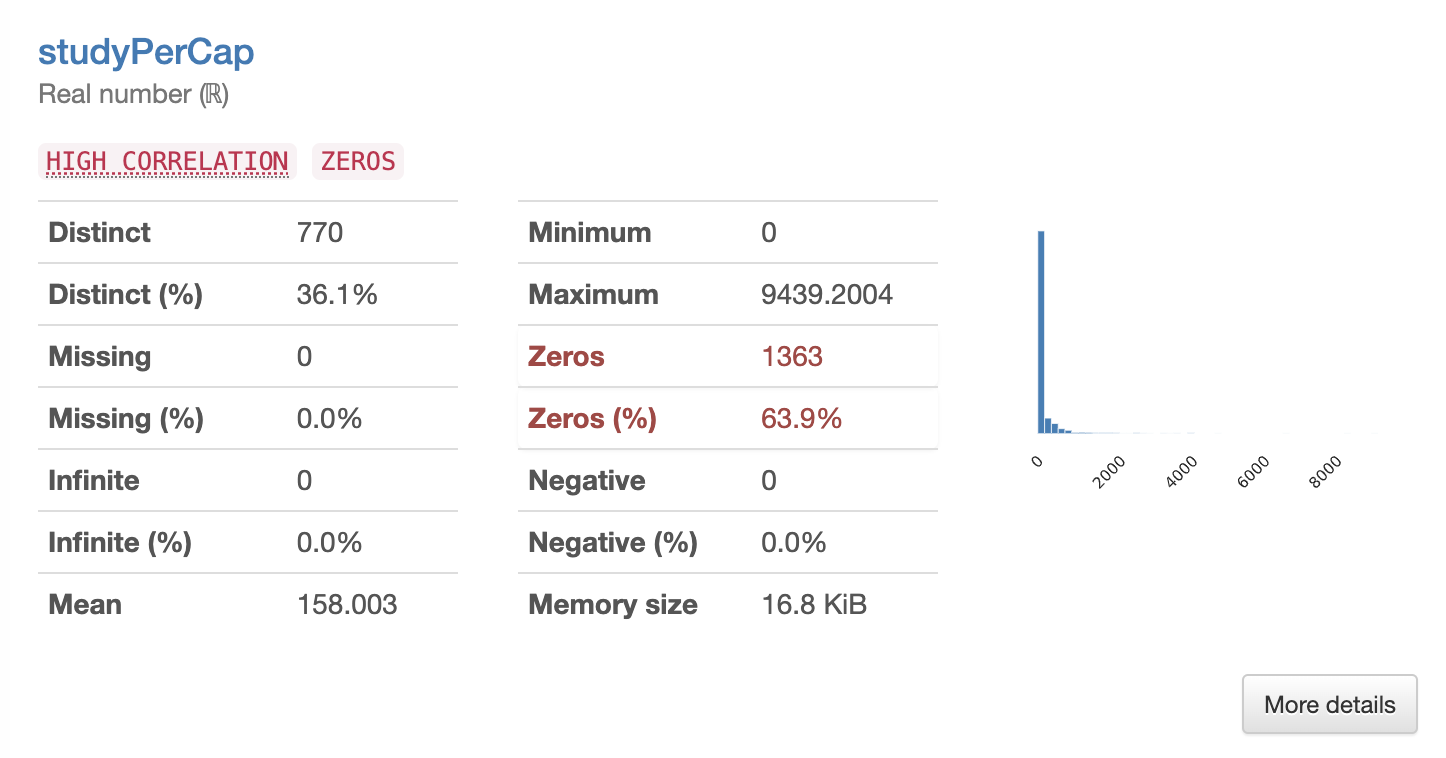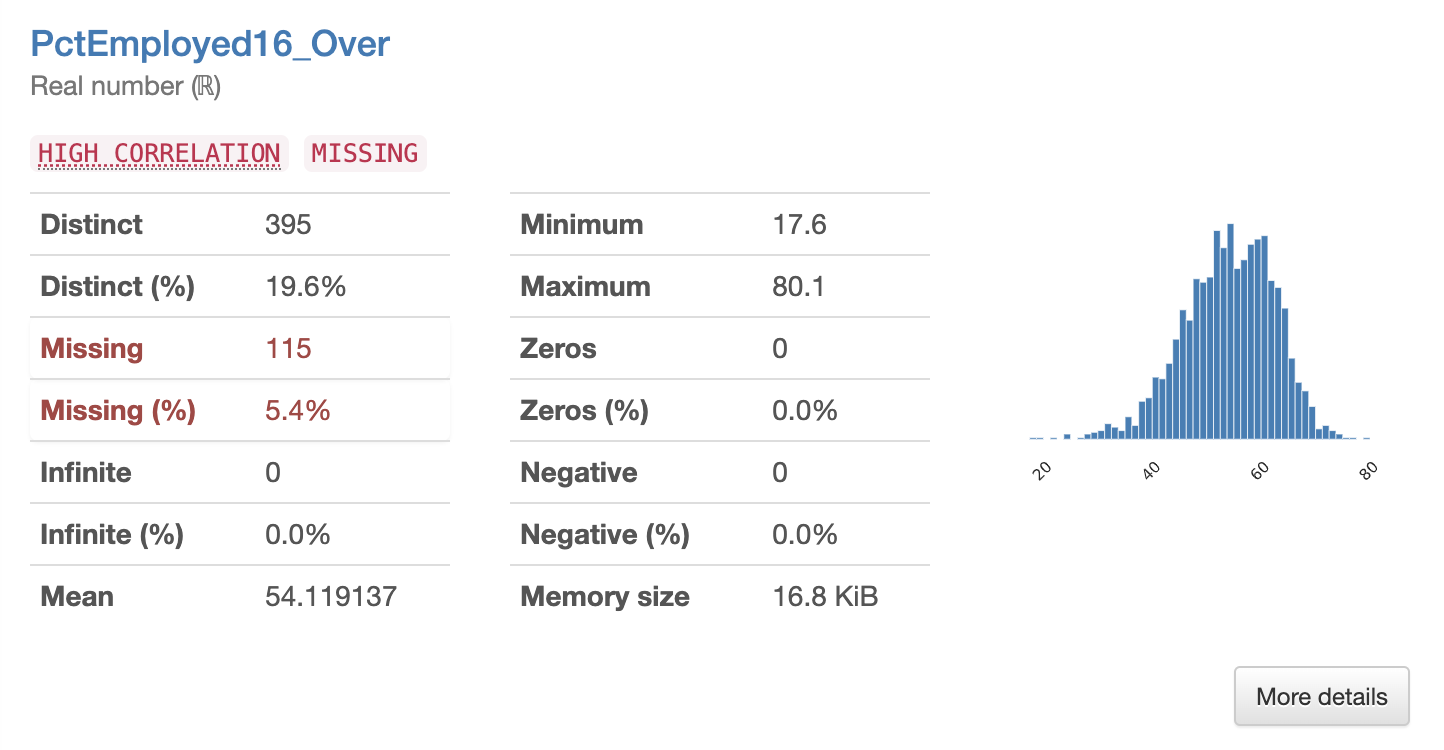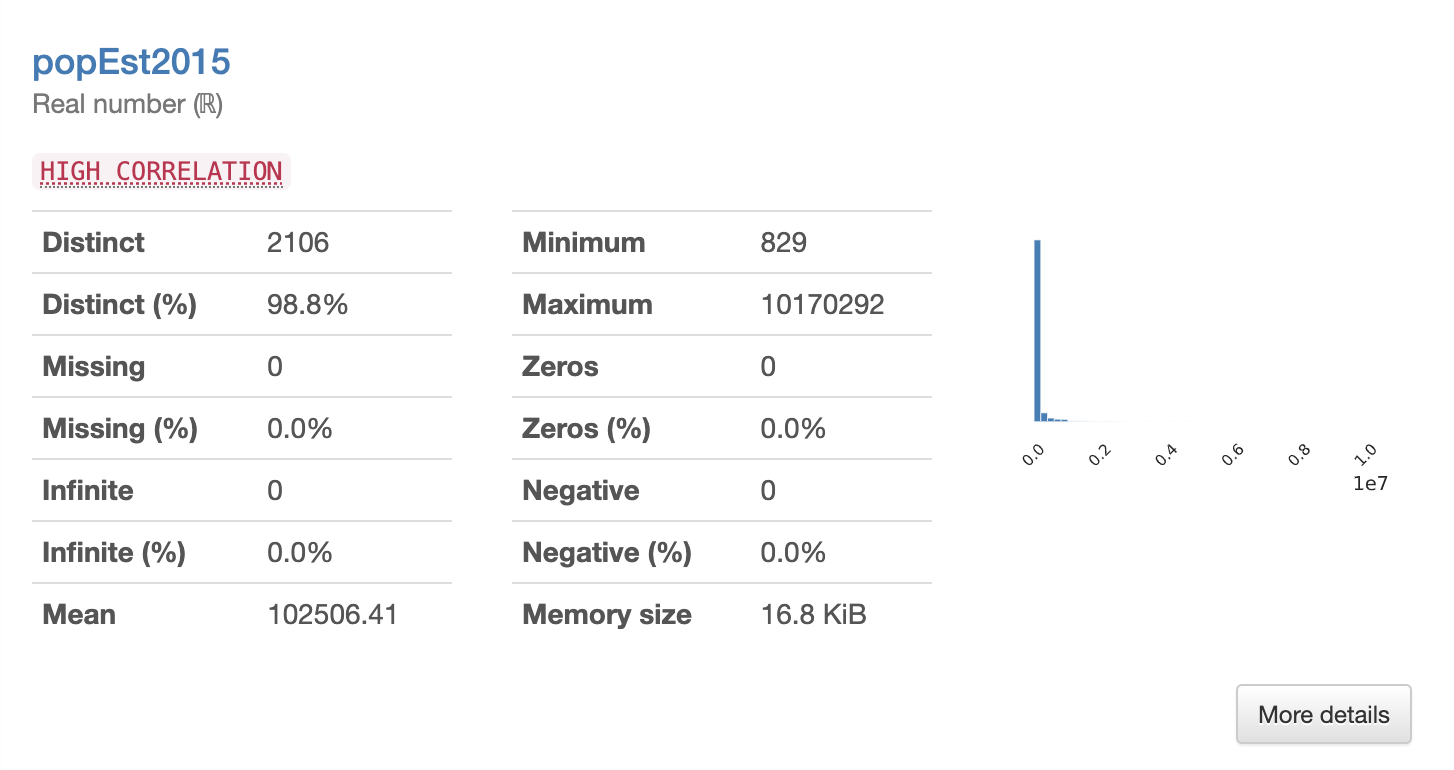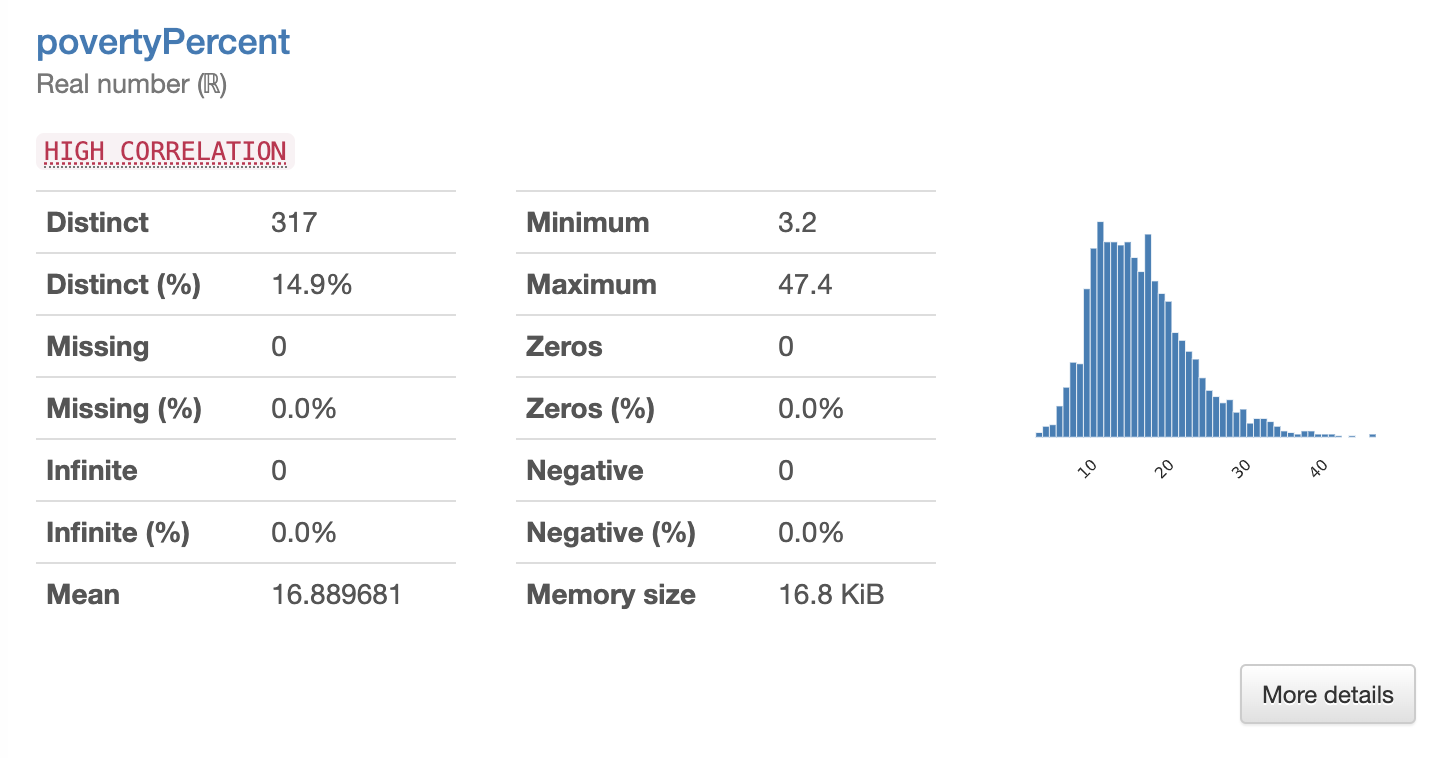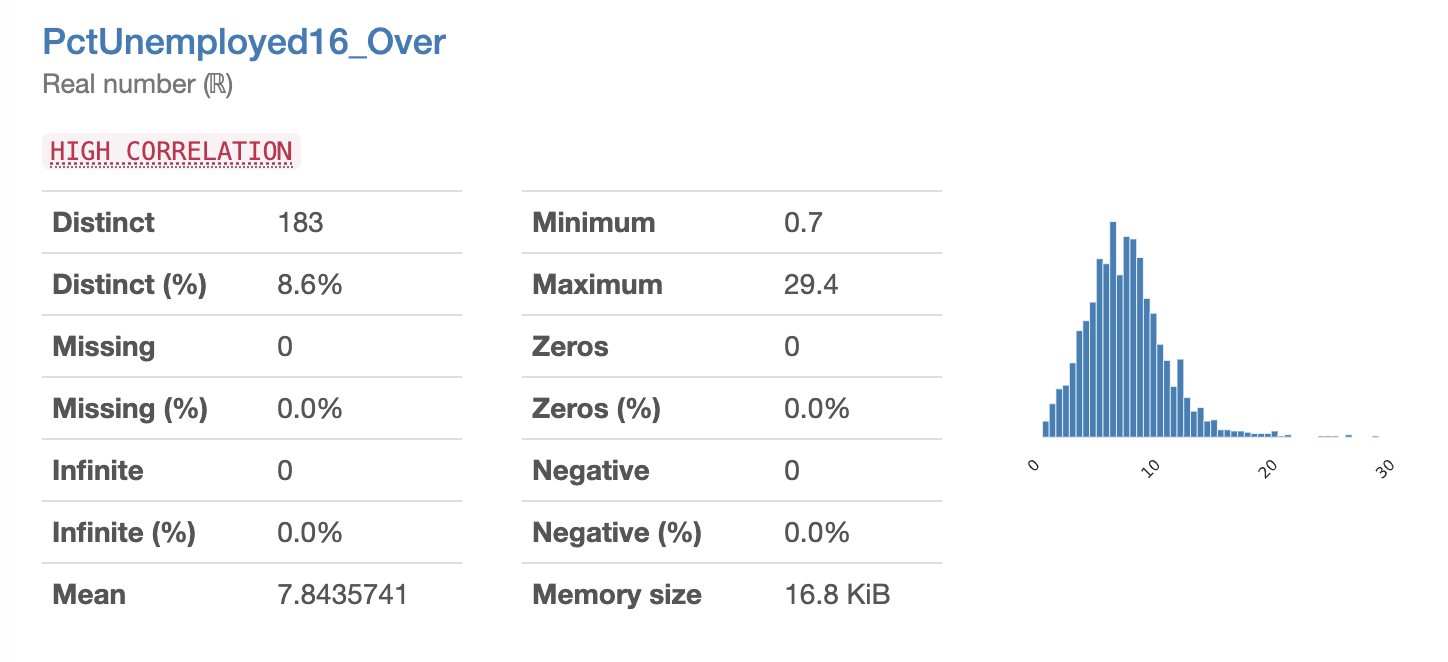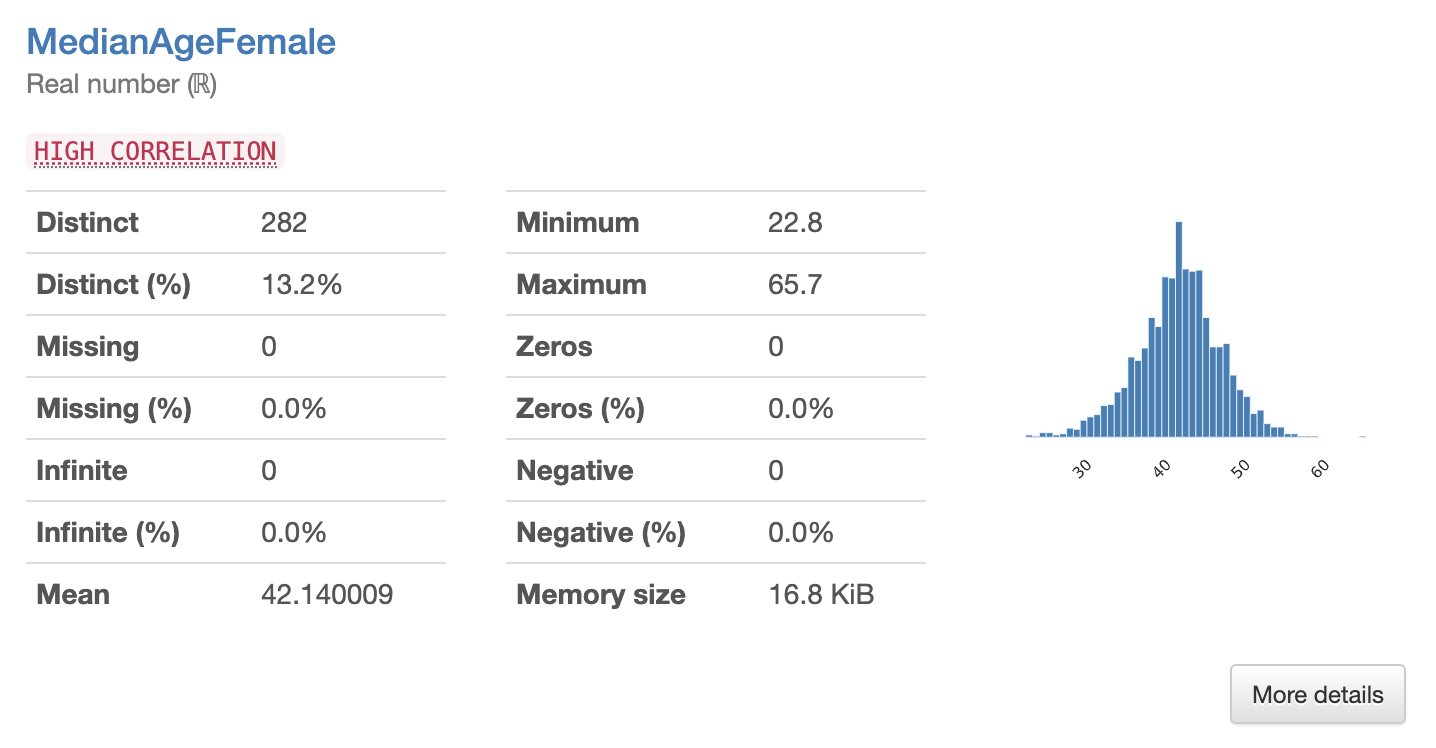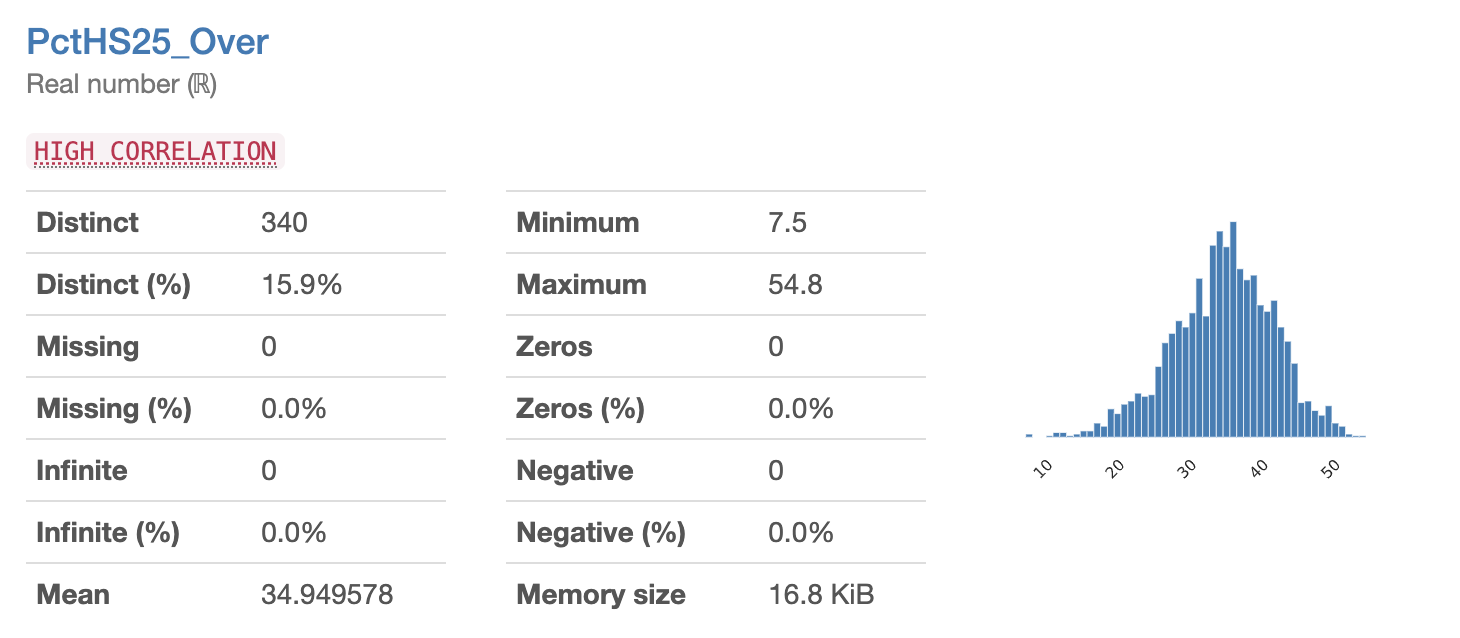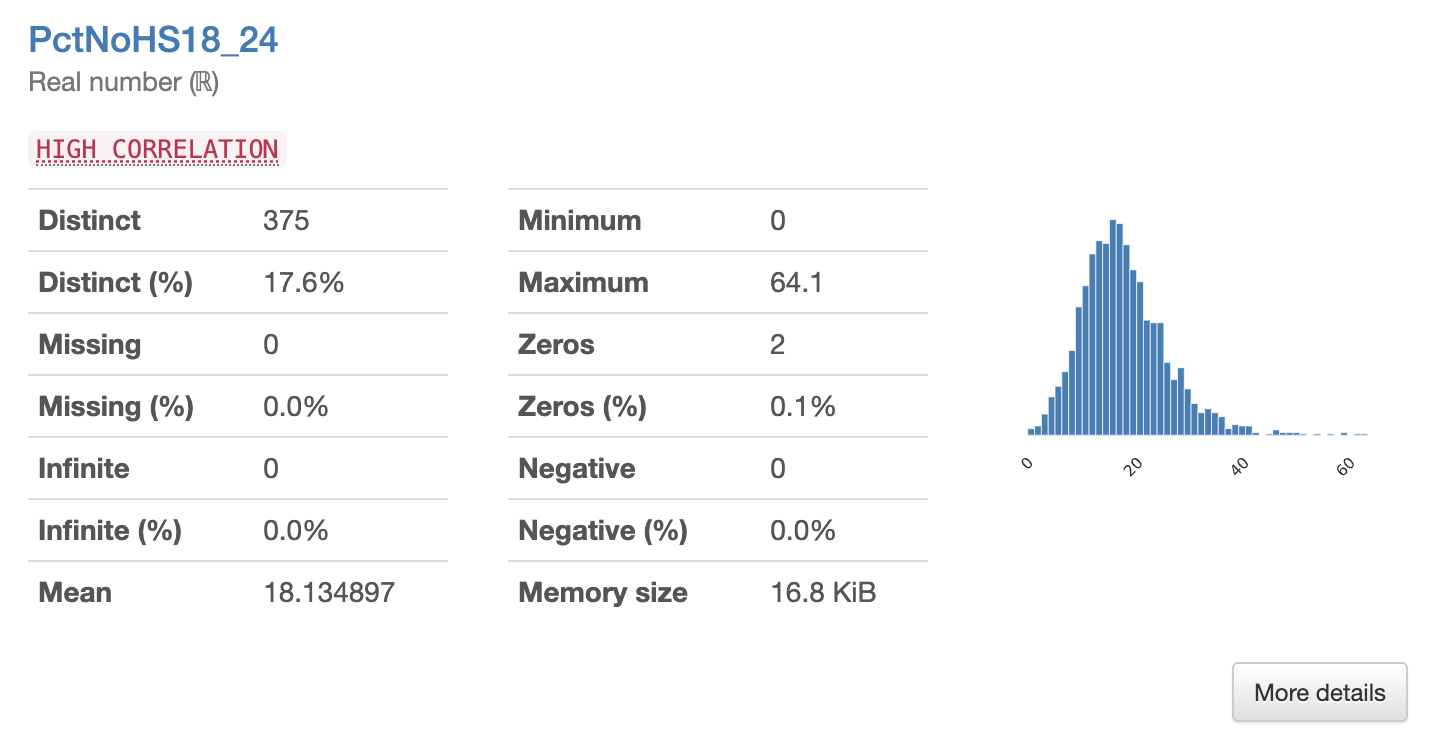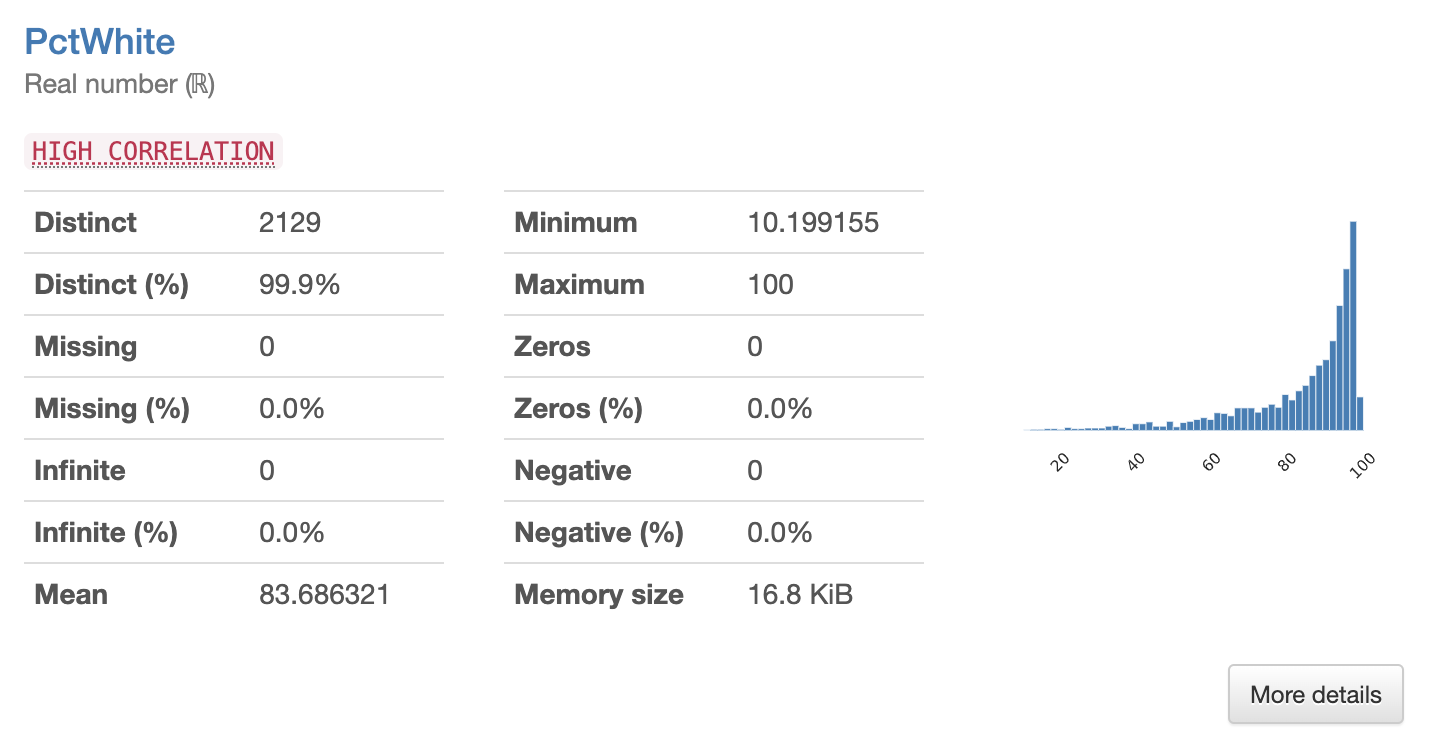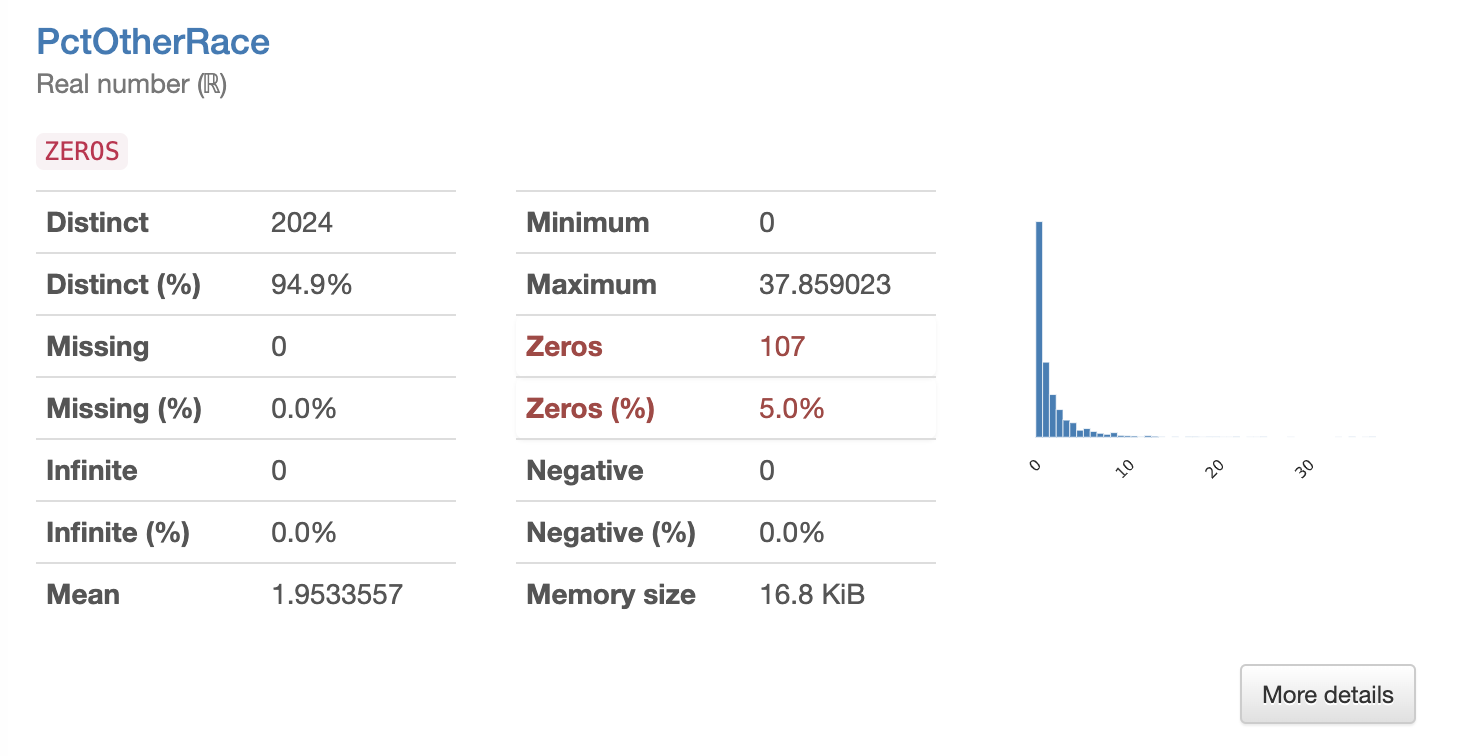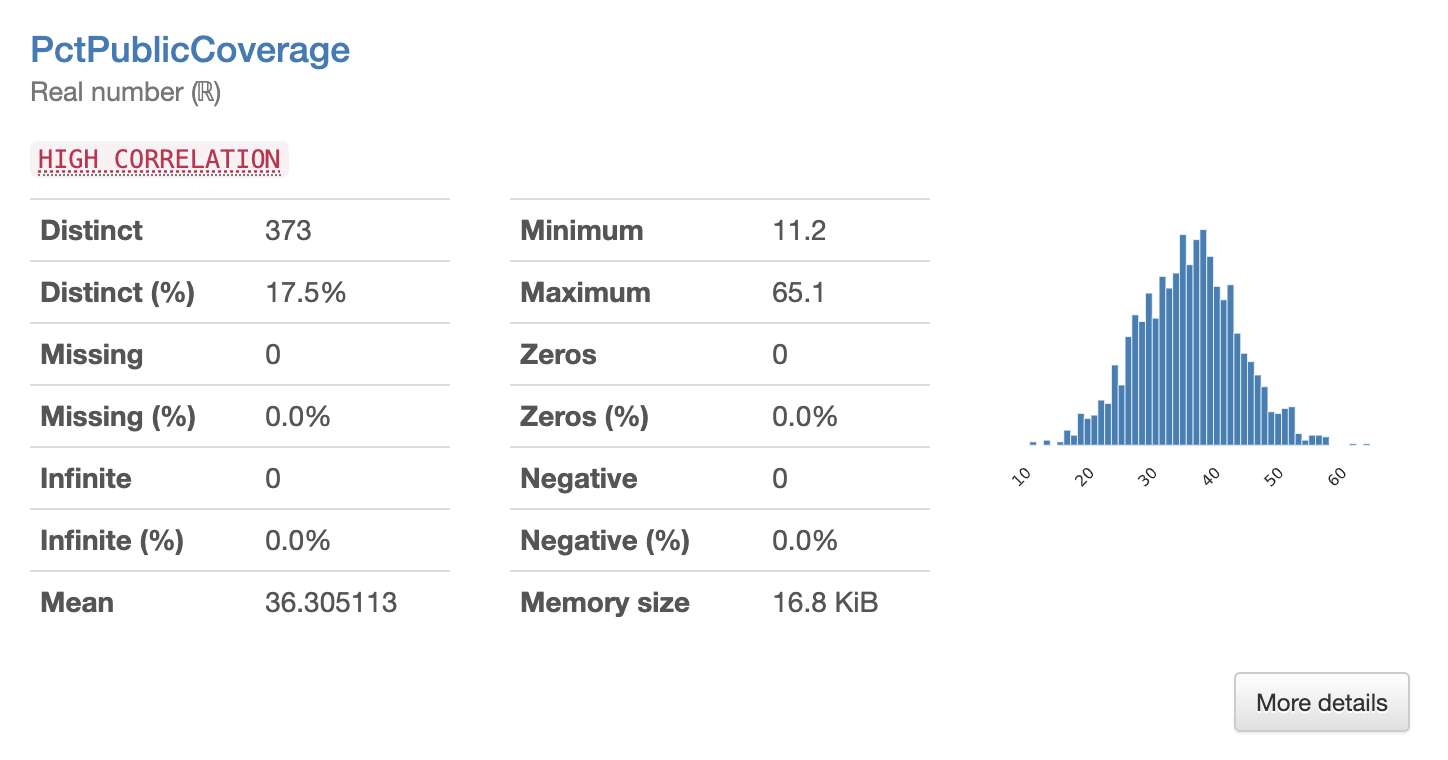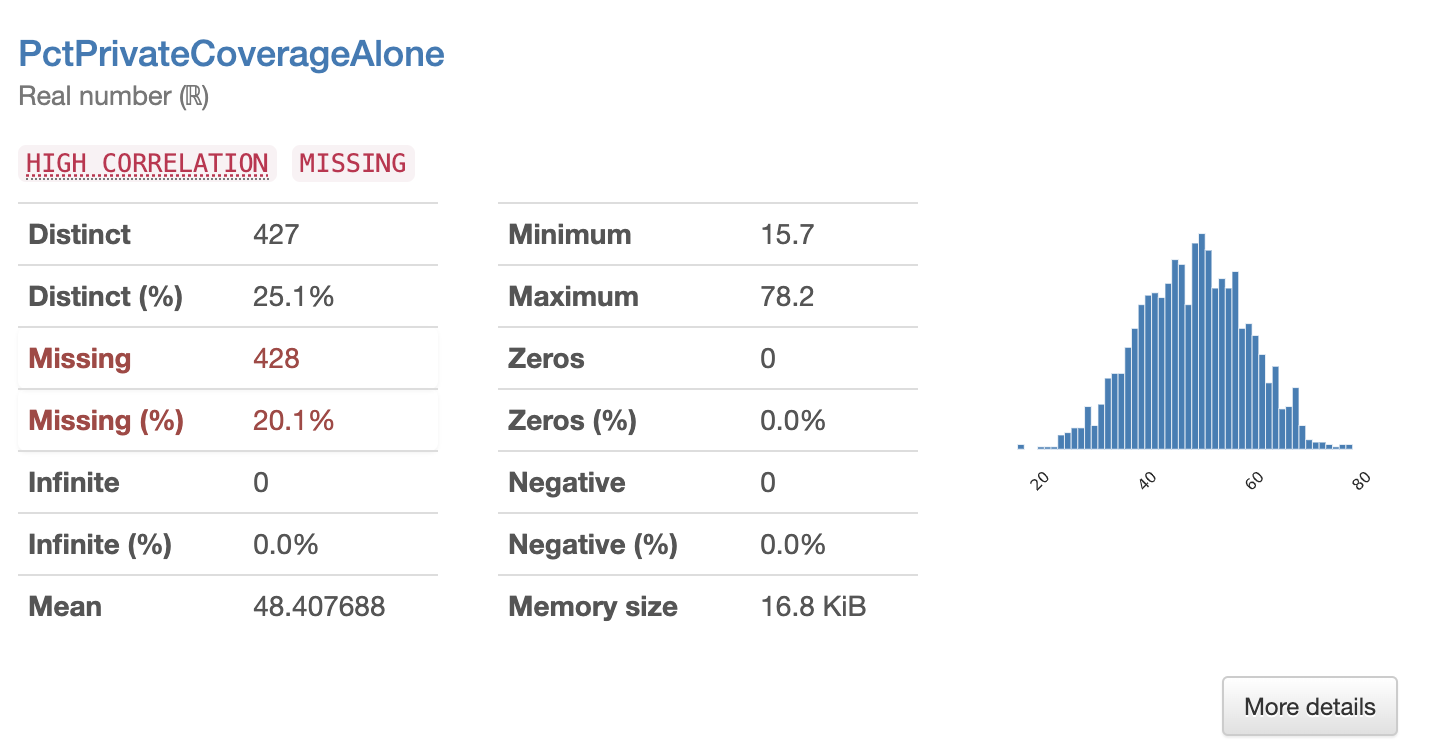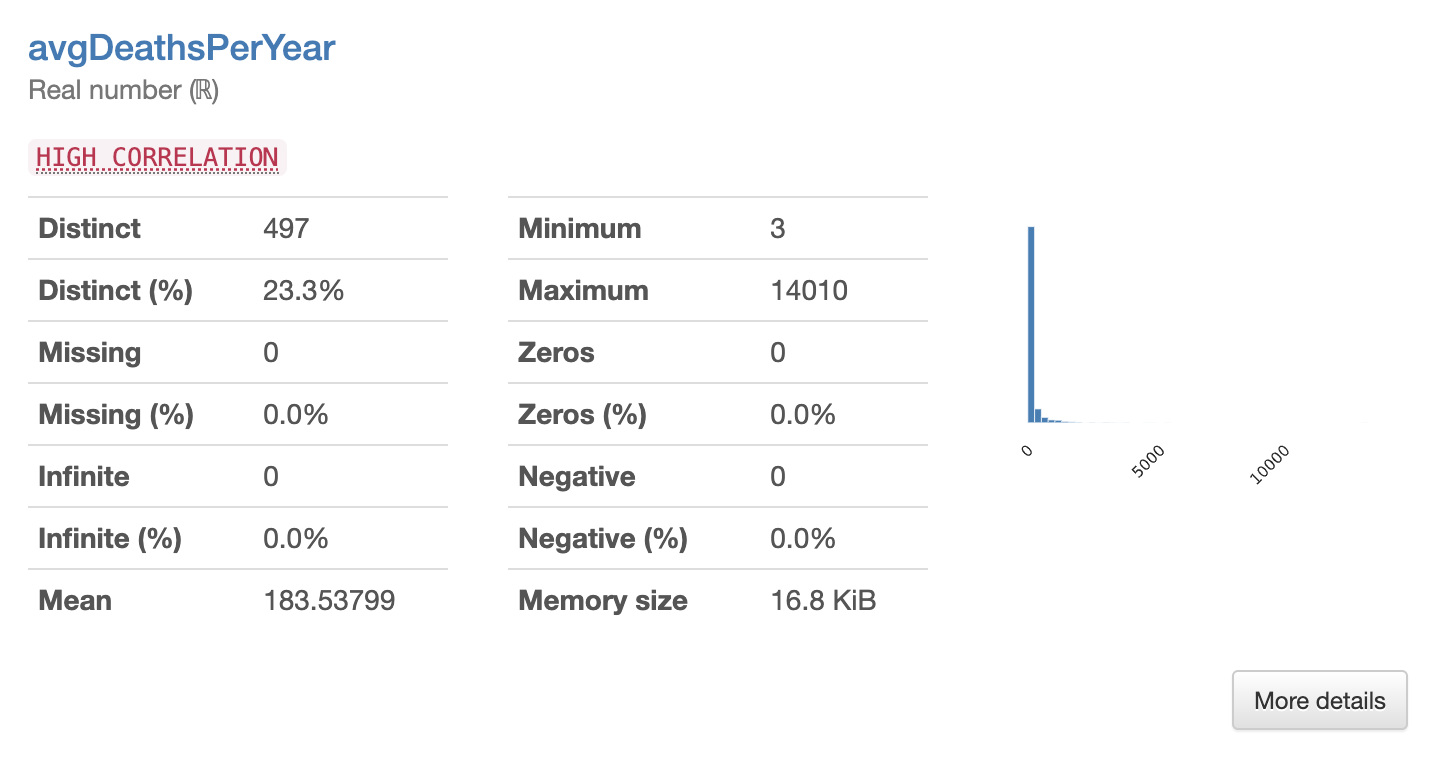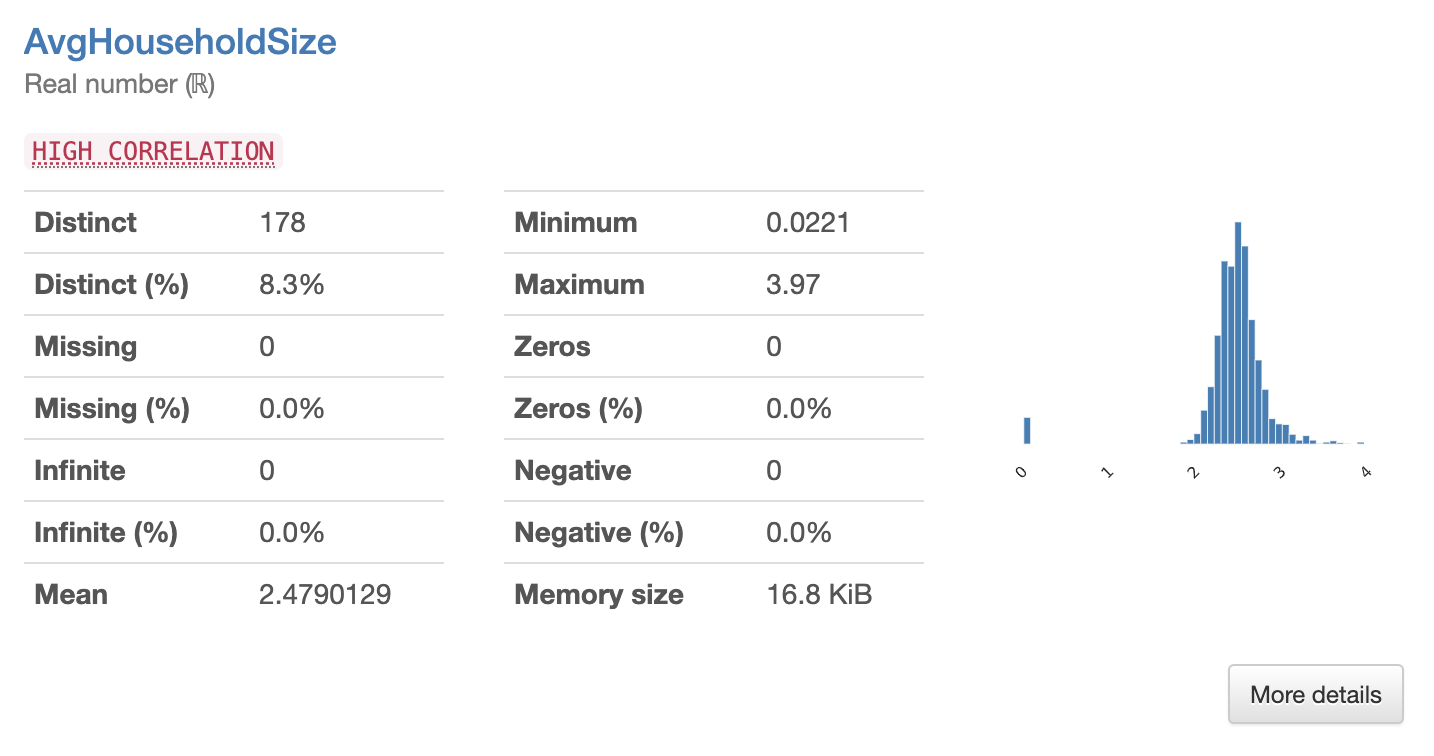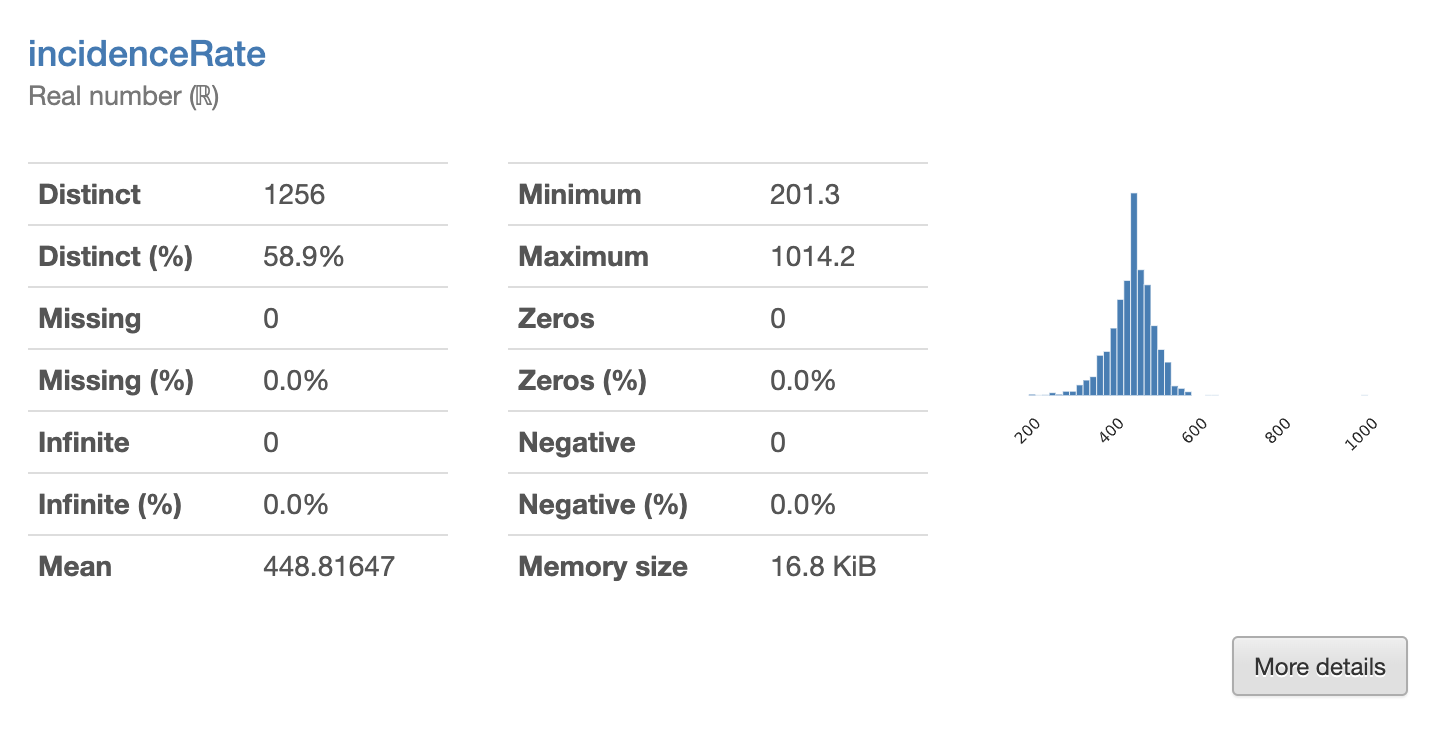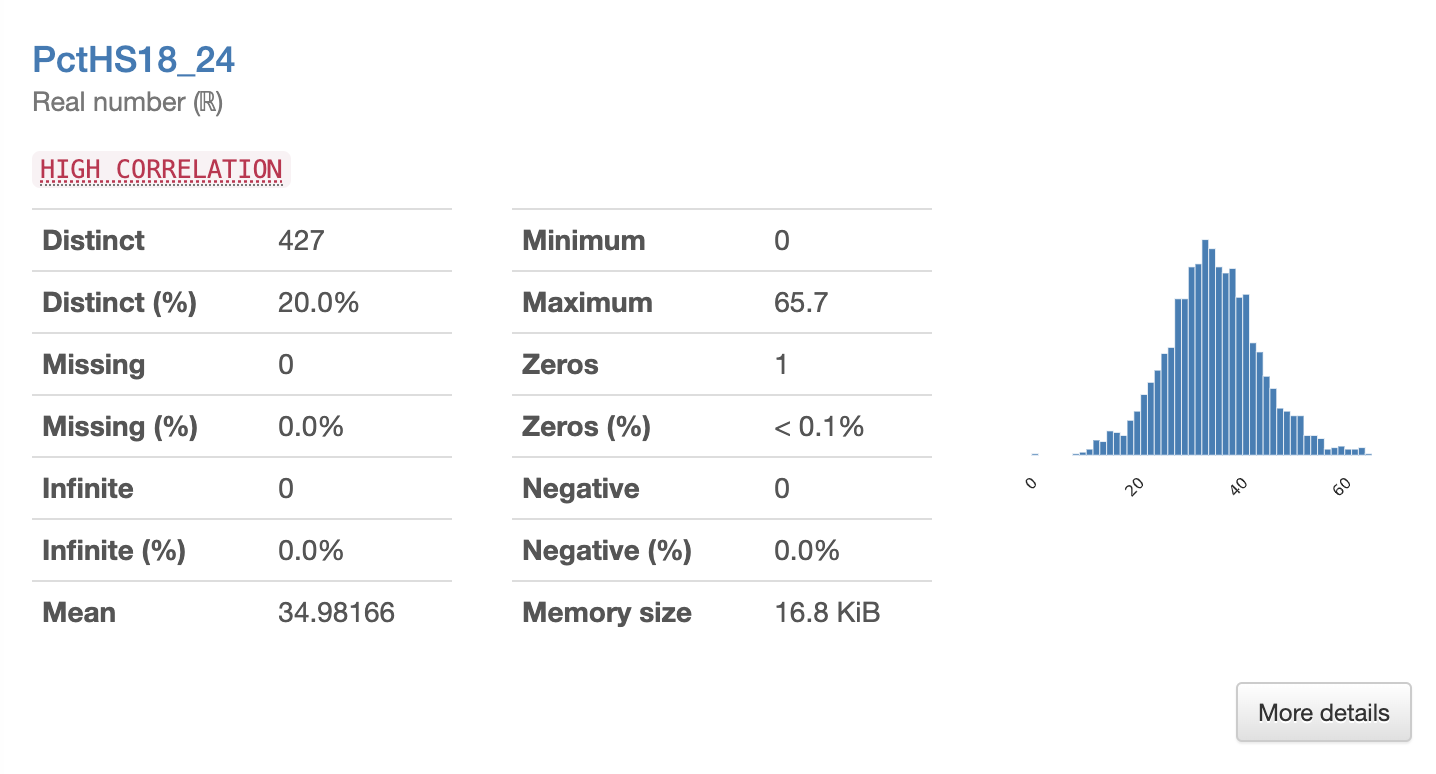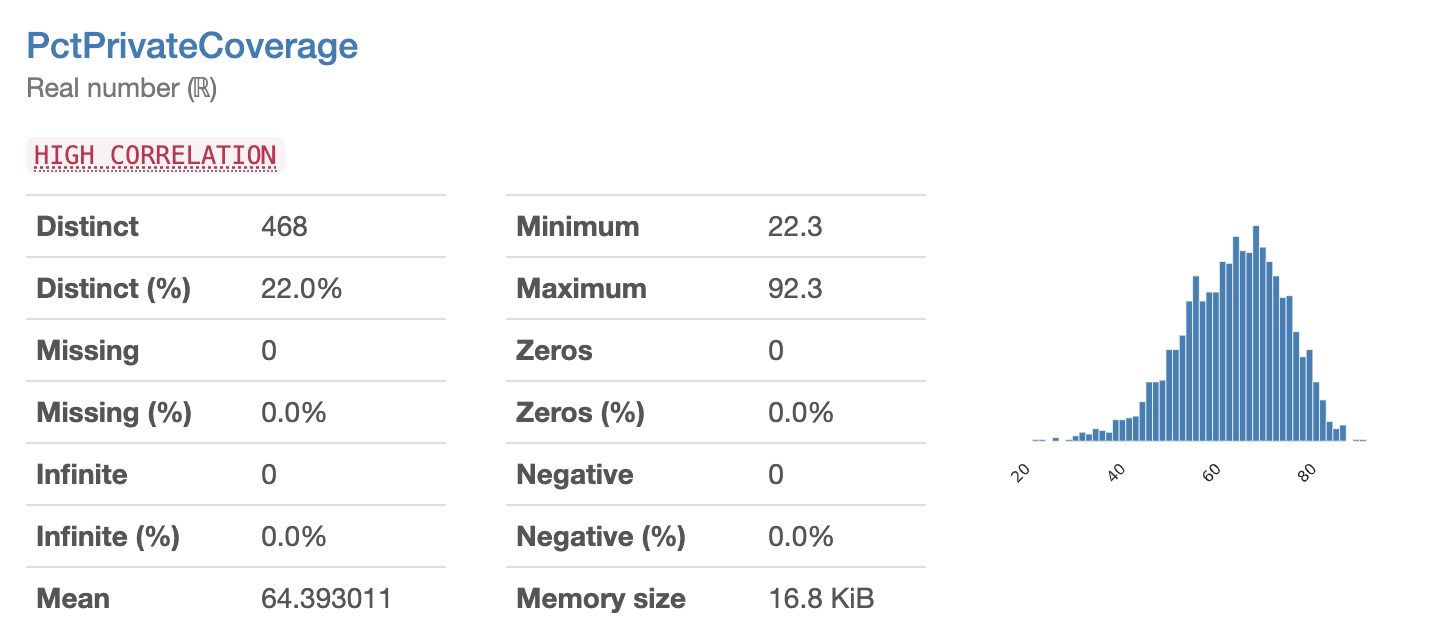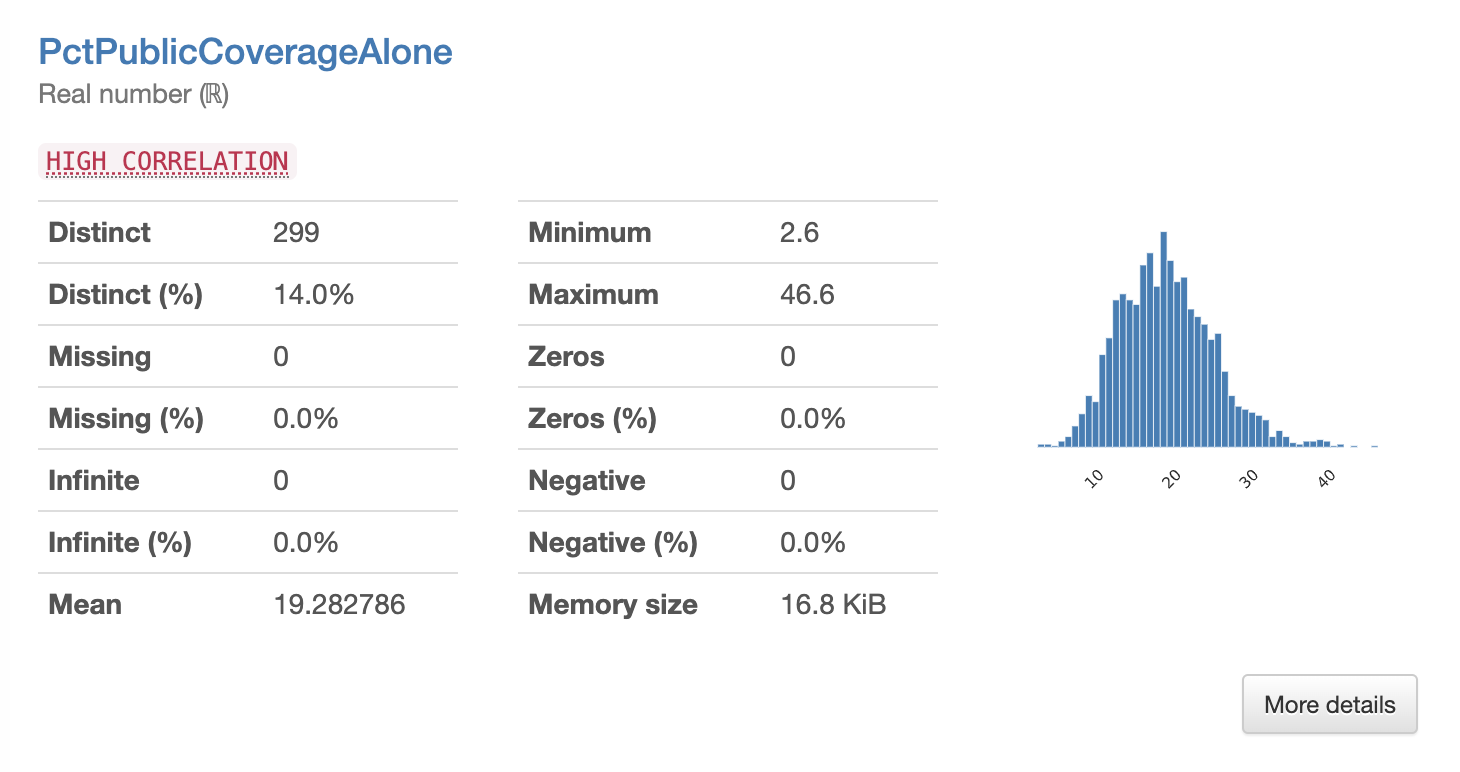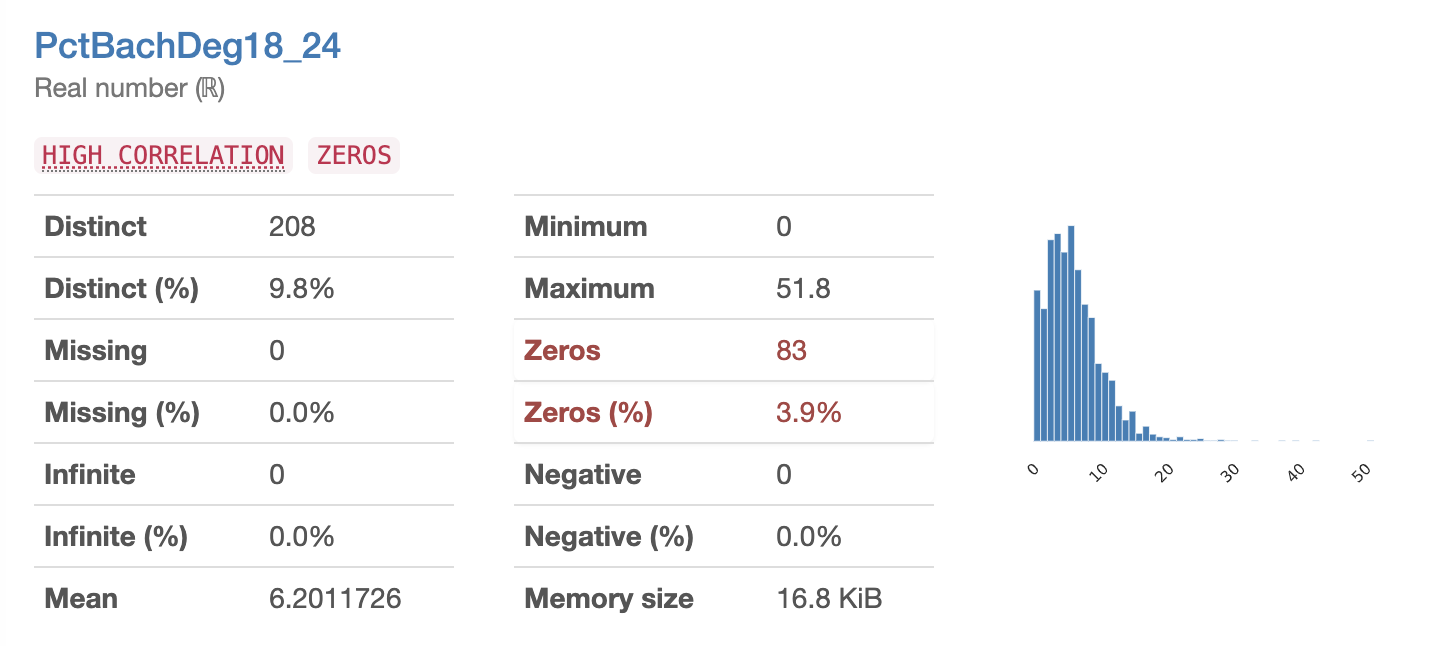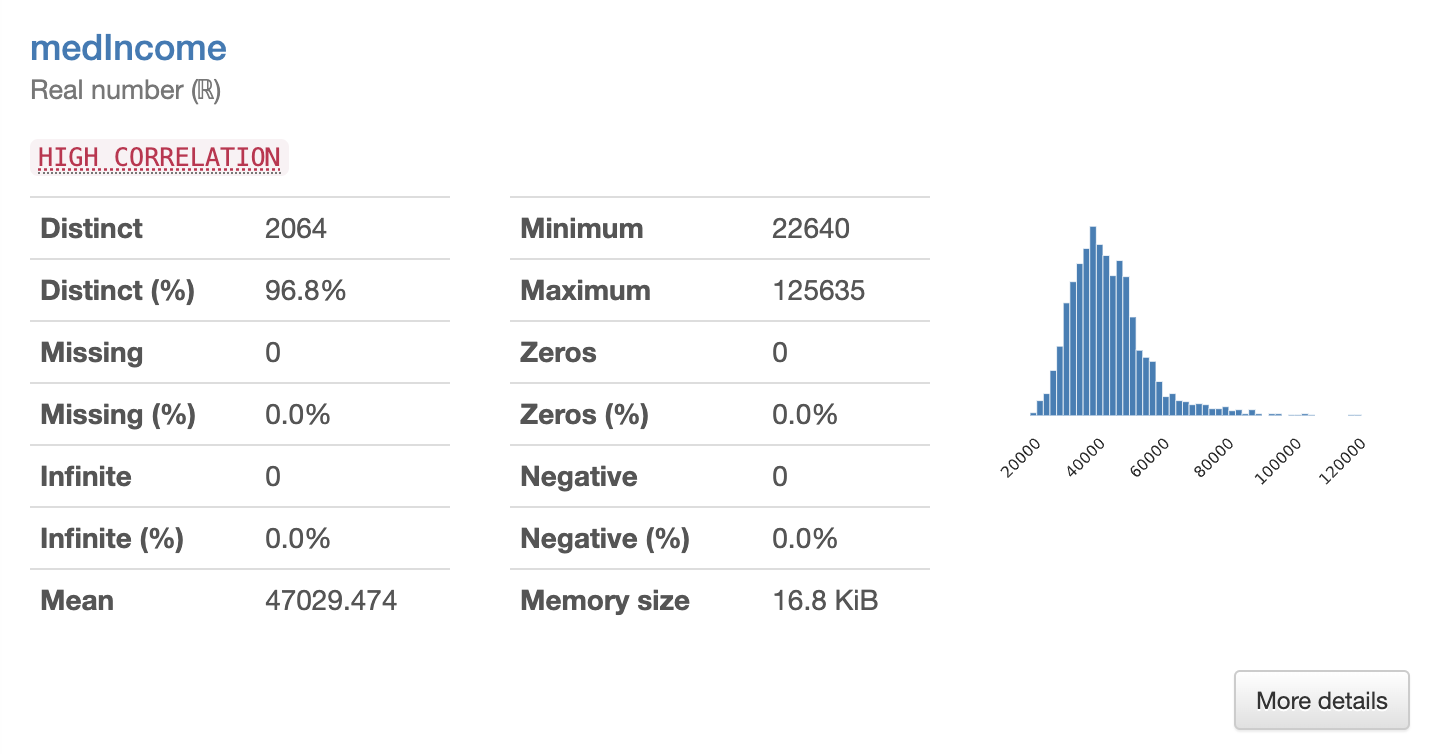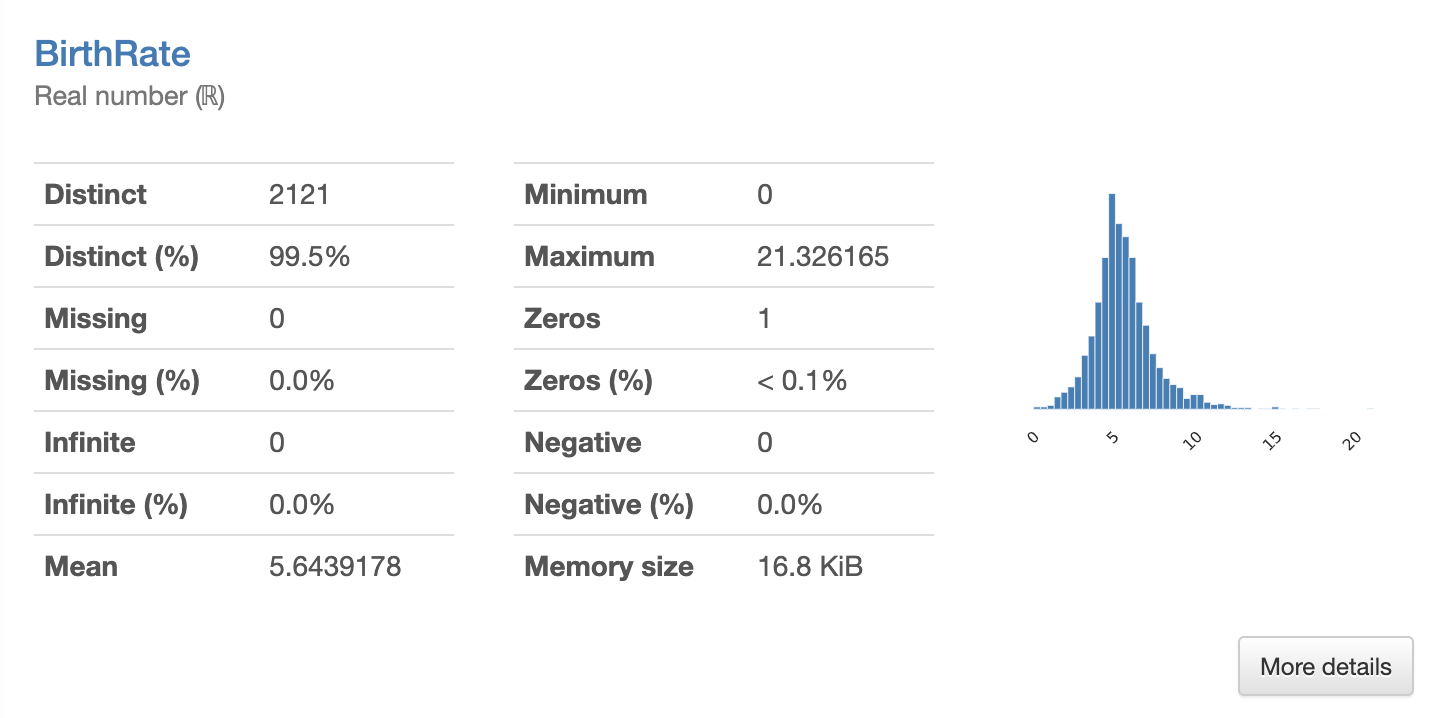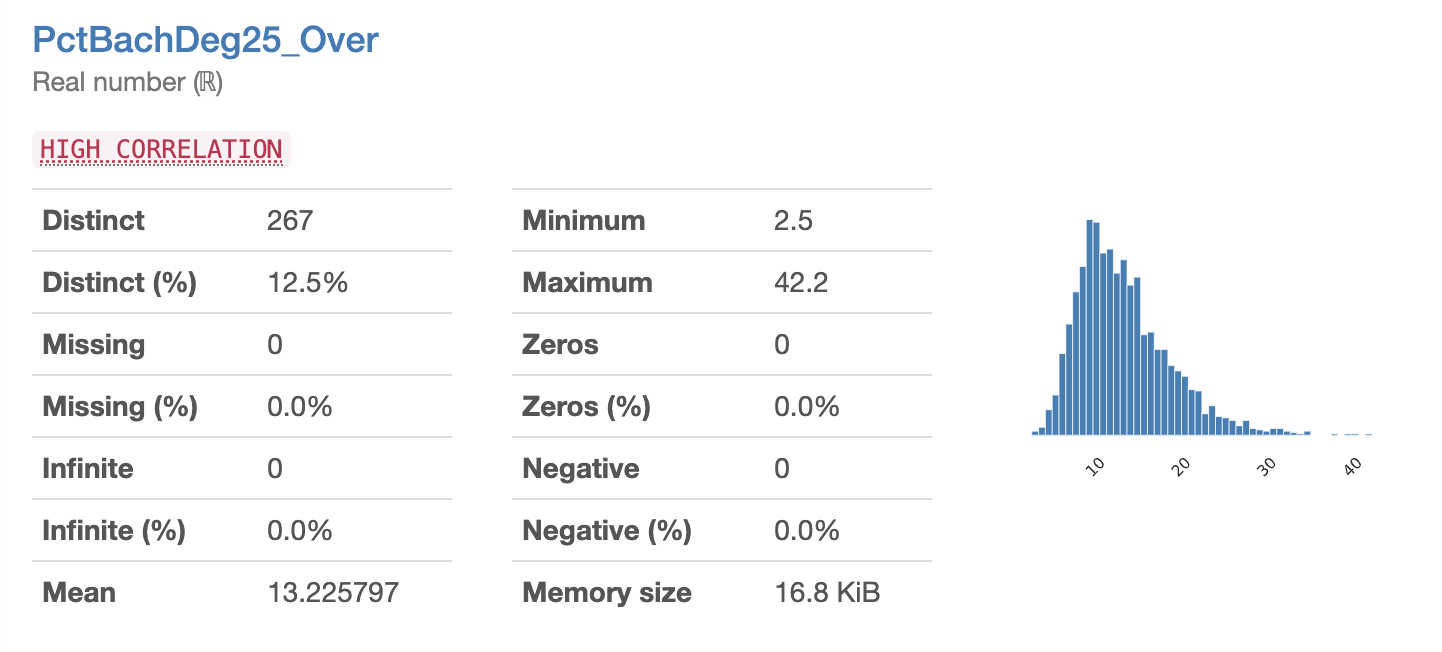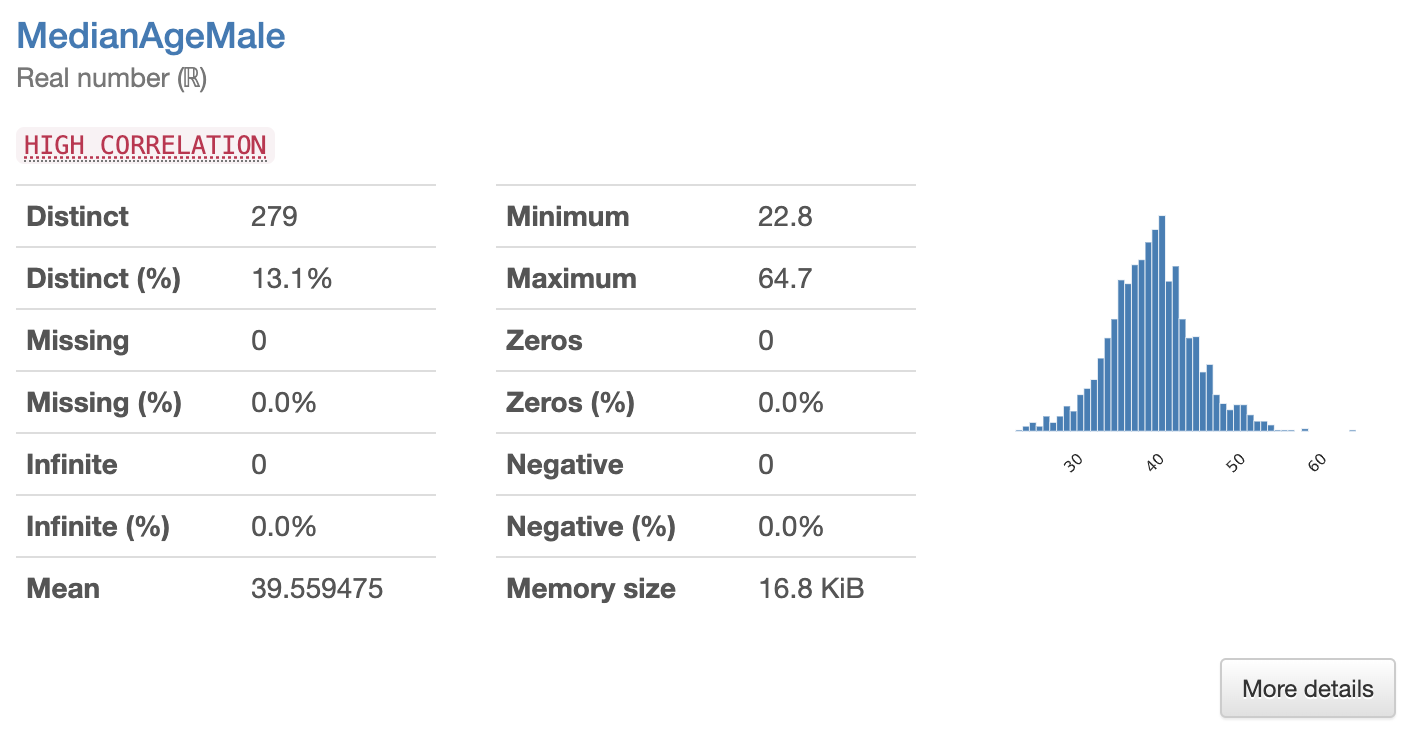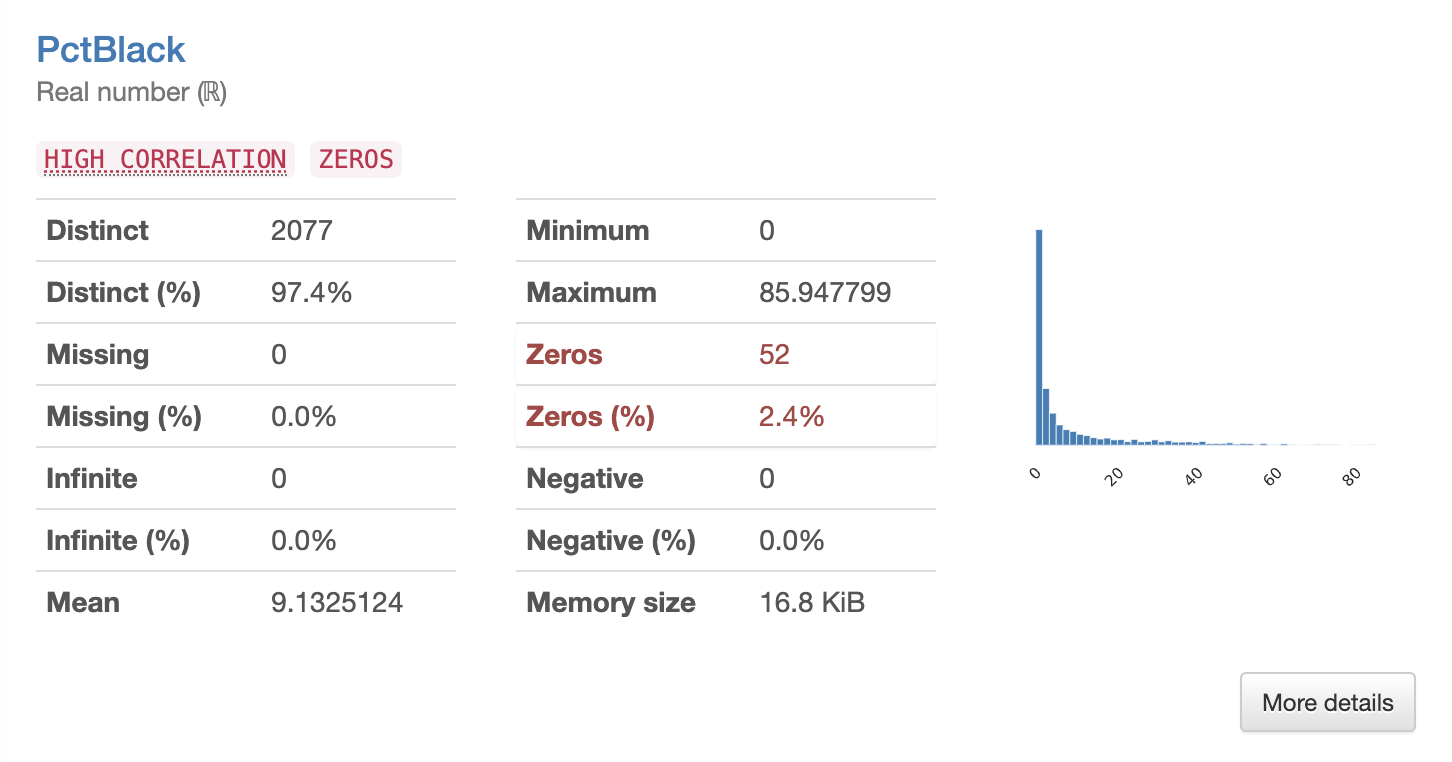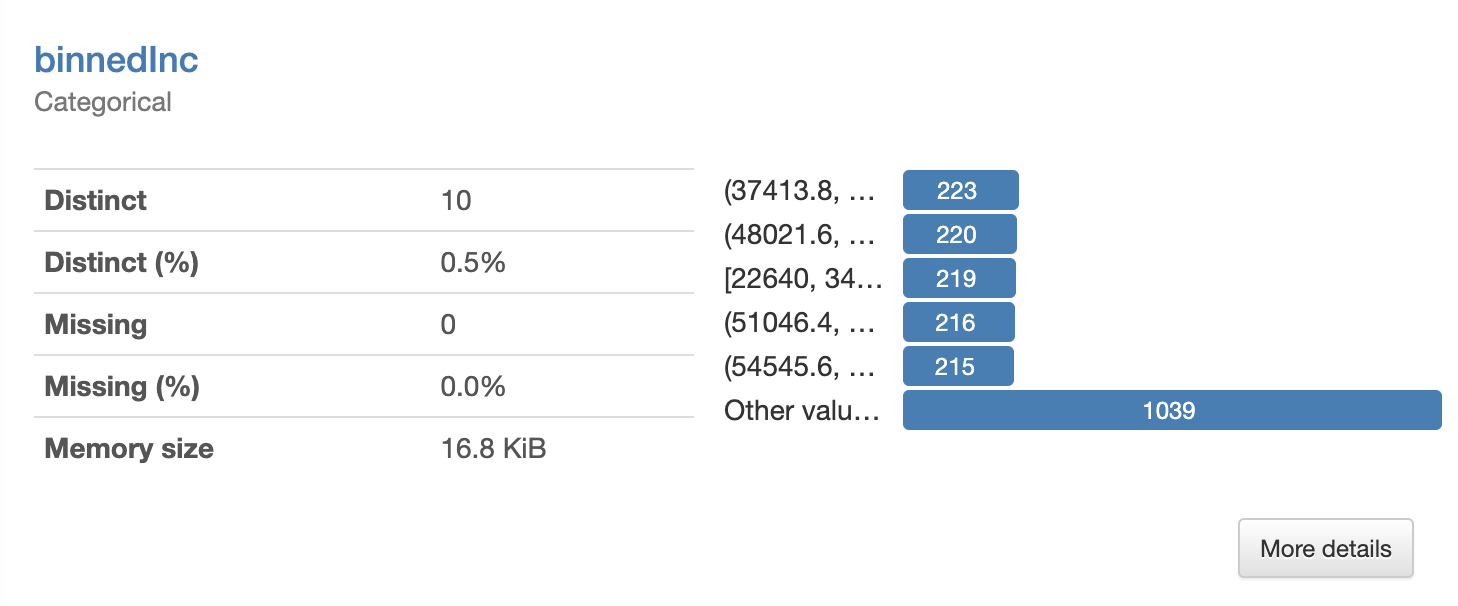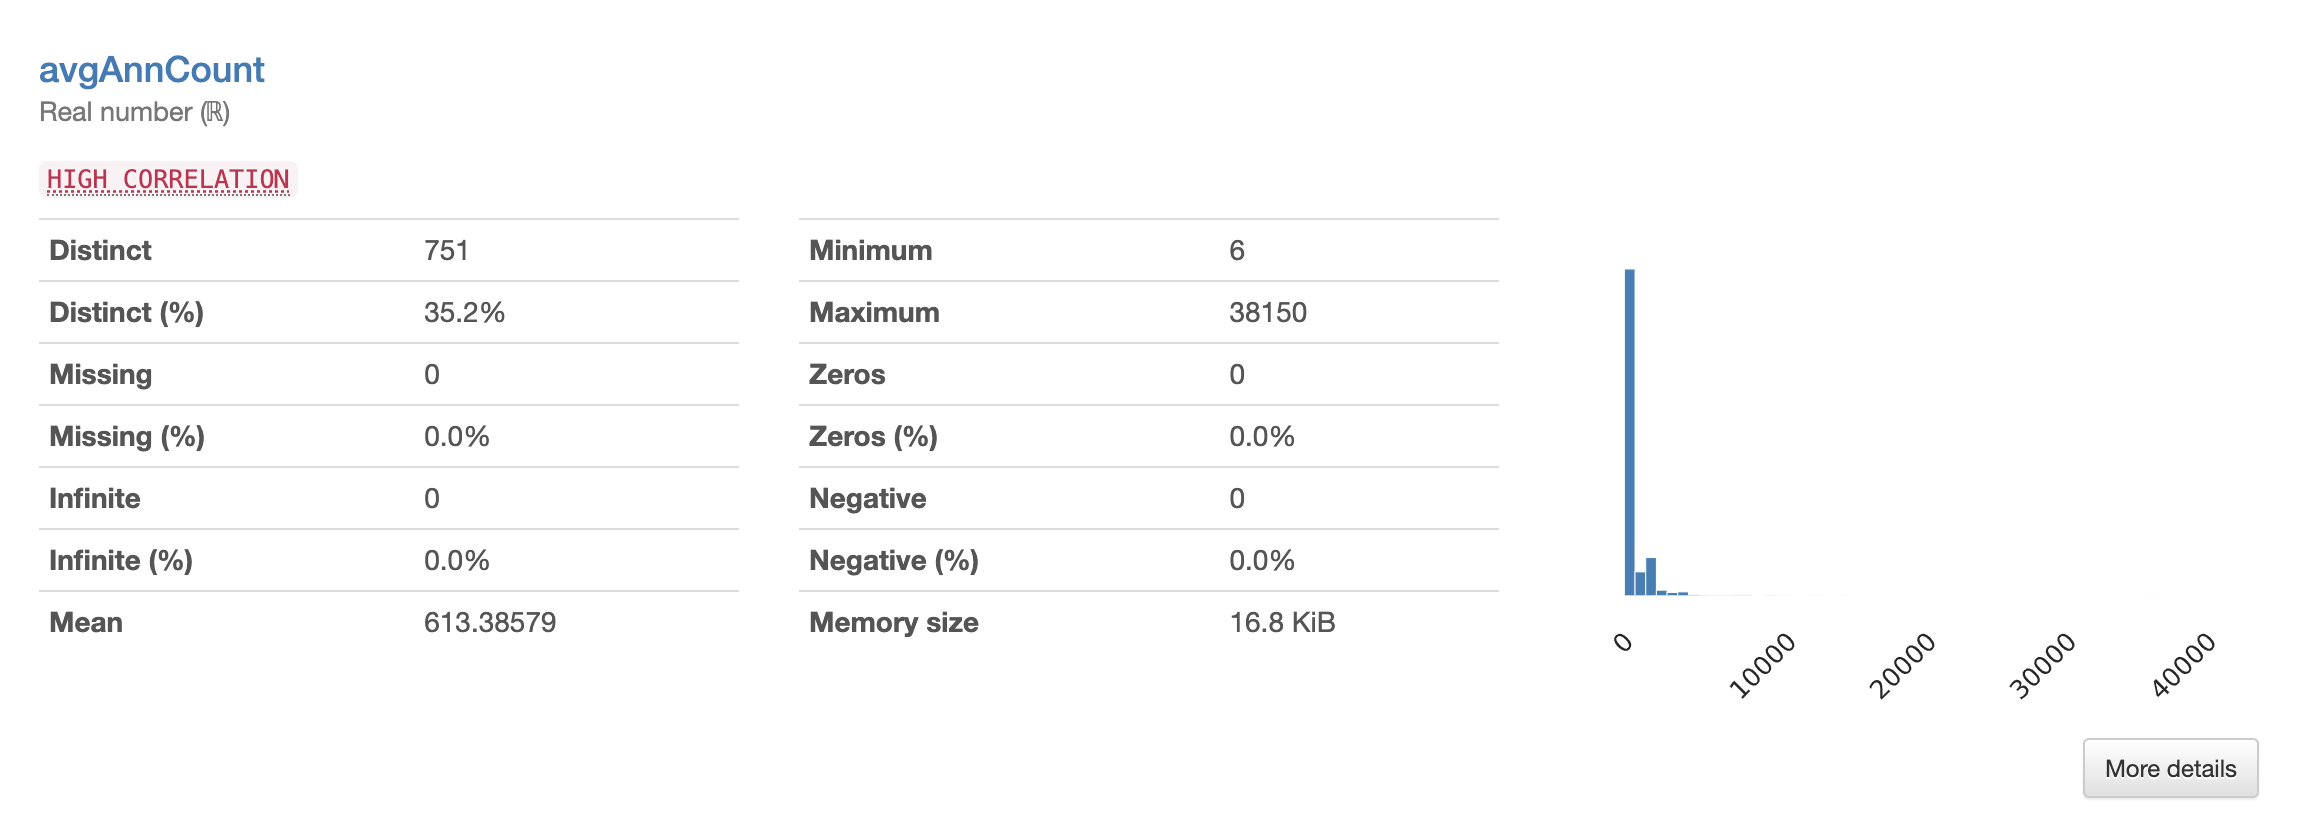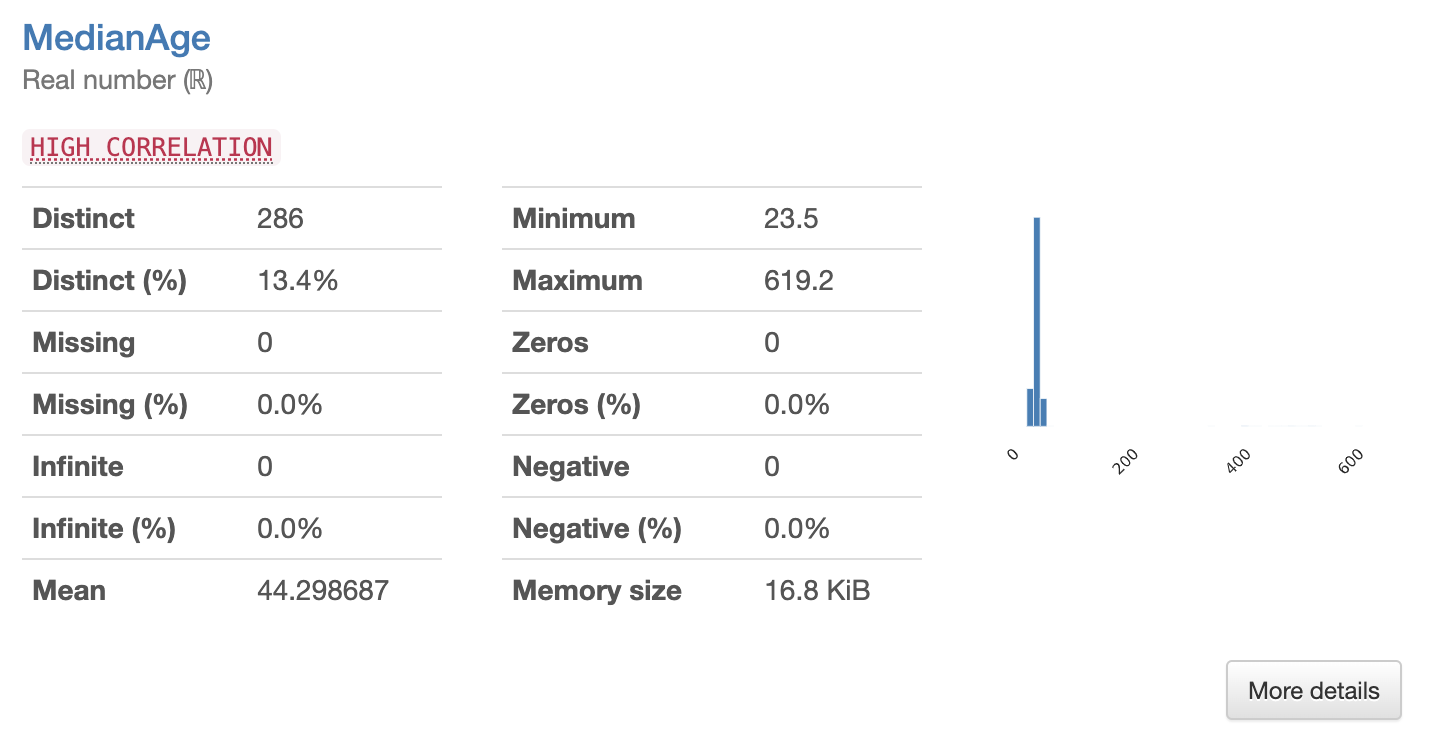

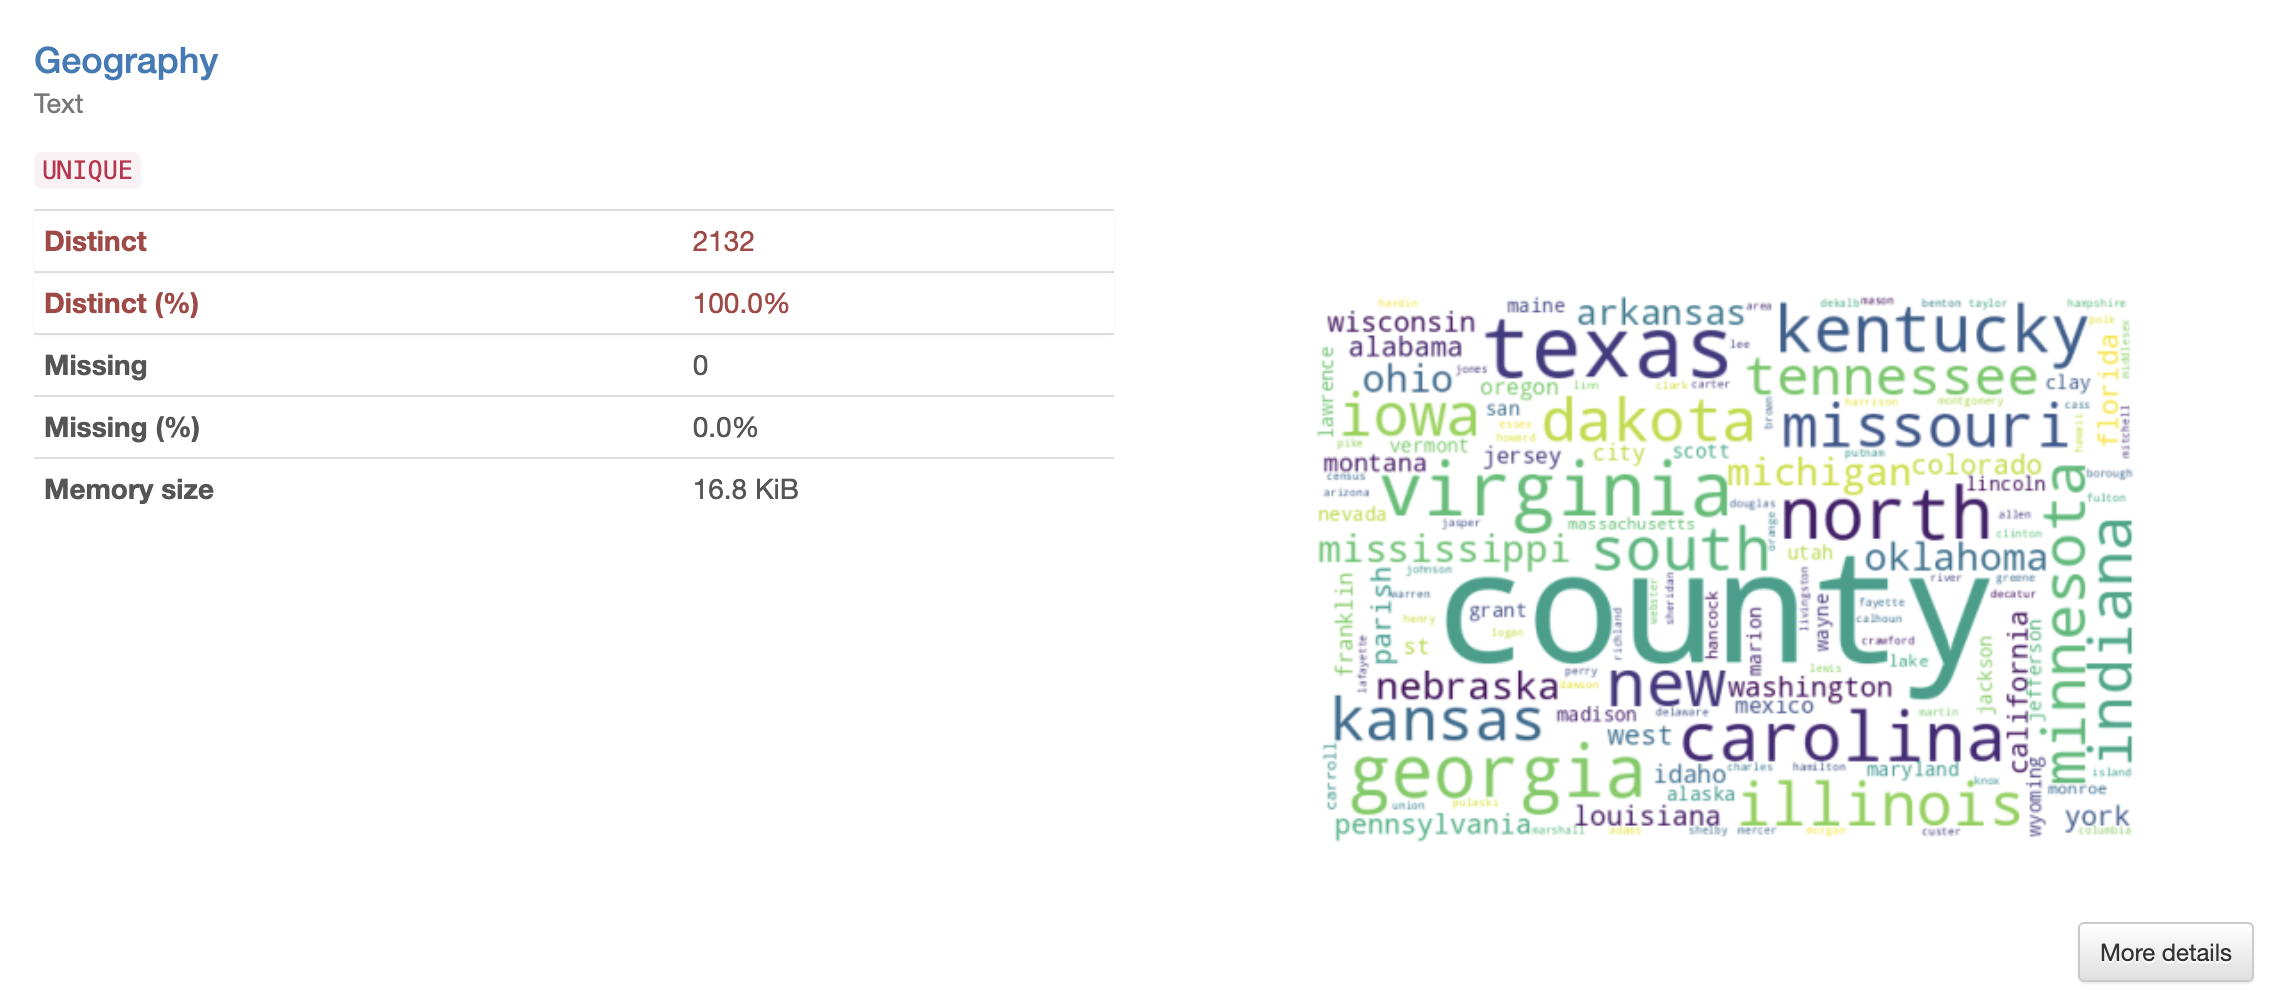

In [288]:
df_train.shape

(2132, 34)

### Tipos de Datos

In [289]:
df_train.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

Nuevamente, podemos observar que la gran mayoría de datos son numéricos, con excepción de Geography y binnedInc, los cuales son categóricos

### Resumen de Atributos Numéricos

In [290]:
df_train.describe()

avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   2132.000000       2132.000000    2132.000000    2132.000000   
mean     613.385785        183.537992     448.816467   47029.474203   
std     1435.393846        507.649052      53.582307   12107.930677   
min        6.000000          3.000000     201.300000   22640.000000   
25%       77.000000         28.000000     421.600000   38875.750000   
50%      174.500000         62.000000     453.549422   45207.000000   
75%      515.250000        141.000000     481.600000   52376.250000   
max    38150.000000      14010.000000    1014.200000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  2.132000e+03     2132.000000  2132.000000  2132.000000    2132.000000   
mean   1.025064e+05       16.889681   158.003002    44.298687      39.559475   
std    3.442282e+05        6.415614   533.636824    39.522898       5.208212   
min    8.290000e+02        3.200000     0.000000    23.500000      22.800000   
25%    1.154725e+04       12.200000     0.000000    37.700000      36.300000   
50%    2.693200e+04       15.900000     0.000000    40.900000      39.600000   
75%    6.663525e+04       20.300000    79.275307    44.000000      42.600000   
max    1.017029e+07       47.400000  9439.200444   619.200000      64.700000   

       MedianAgeFemale  AvgHouseholdSize  PercentMarried  PctNoHS18_24  \
count      2132.000000       2132.000000     2132.000000   2132.000000   
mean         42.140009          2.479013       51.756285     18.134897   
std           5.272267          0.421538        6.925242      8.091987   
min          22.800000          0.022100       23.100000      0.000000   
25%          39.000000          2.360000       47.775000     12.700000   
50%          42.300000          2.500000       52.300000     17.100000   
75%          45.400000          2.630000       56.500000     22.425000   
max          65.700000          3.970000       72.500000     64.100000   

        PctHS18_24  PctSomeCol18_24  PctBachDeg18_24  PctHS25_Over  \
count  2132.000000       528.000000      2132.000000   2132.000000   
mean     34.981660        41.151705         6.201173     34.949578   
std       9.024105        11.046405         4.628540      7.056699   
min       0.000000         7.100000         0.000000      7.500000   
25%      29.200000        34.000000         3.100000     30.600000   
50%      34.700000        40.600000         5.400000     35.400000   
75%      40.700000        46.725000         8.300000     39.800000   
max      65.700000        79.000000        51.800000     54.800000   

       PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
count        2132.000000         2017.000000           2132.000000   
mean           13.225797           54.119137              7.843574   
std             5.395211            8.398898              3.448596   
min             2.500000           17.600000              0.700000   
25%             9.300000           48.600000              5.500000   
50%            12.300000           54.400000              7.600000   
75%            16.100000           60.300000              9.700000   
max            42.200000           80.100000             29.400000   

       PctPrivateCoverage  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count         2132.000000              1704.000000         2132.000000   
mean            64.393011                48.407688           41.237899   
std             10.670887                 9.985504            9.326155   
min             22.300000                15.700000           13.500000   
25%             57.175000                41.275000           34.600000   
50%             65.300000                48.800000           41.300000   
75%             72.100000                55.500000           47.600000   
max             92.300000                78.200000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone   

Basado en el análisis de cada atributo, se pueden obtener las siguientes observaciones

* El atributo PctSomeCol18_24, el cual representa el porcentaje de residentes del condado entre las edades 18-24 cuyo nivel educativo es escuela secundaria. Contiene un 75% de datos nulos, siendo el atributo de todos los datos que más datos nulos contiene, por lo que debido a que se pierden muchos datos y no es muy conveniente hacer imputación de datos al aumentar el sesgo de los modelos, lo más recomendable es no tomar en cuenta este dato para el entrenamiento, o un atributo en el cual se tenga una alta correlación con este mismo atributo.

* El atributo PctPrivateCoverageAlone presenta un 20% de datos nulos en el total de los datos, por lo que al perder una cantidad significativa de datos, al igual que con el atributo PctSomeCol18_24, lo recomendable es no tener en cuenta directamente este atributo en el modelo.

* El atributo PctEmploye16_Over, contiene un 5.4% de valores nulos con respecto a la totalidad de los datos, por lo que existiría una posibilidad de tener en cuenta este modelo ya que sólo se tendrían que eliminar 115 datos, se podría eliminar únicamente si se encuentra otro atributo que contenga una correlación alta y que contenga más datos que este atributo.

* El atributo medianAge presenta valores inconsistentes, ya que contiene edades mayores a 100 años, los cuales es muy poco probable que un ser humano sobreviva a estas edades, por lo que los valores posibles que se considerarán serán mayores a 67, este limite se estableció debido a que es un valor máximo de otro atributo con correlación que corresponde al medianAge separado al género tanto masculino como femenino.

* Debido a que el atributo Geography es un tipo de dato Texto, es necesario realizar una conversión de este atributo mediante diferentes técnicas como one-hot encoding o label-encoding. Sin embargo, este atributo posee el problema de que contiene sólo valores únicos, por lo que la variabilidad es muy alta.

* El atributo binnedInc resulta ser categórico, sin embargo, contiene únicamente 10 valores únicos a lo largo de todos los datos, por lo que para que este atributo pueda pasar a los modelos, se podría utilizar un tipo de encoding como one-hot encoding o label encoding



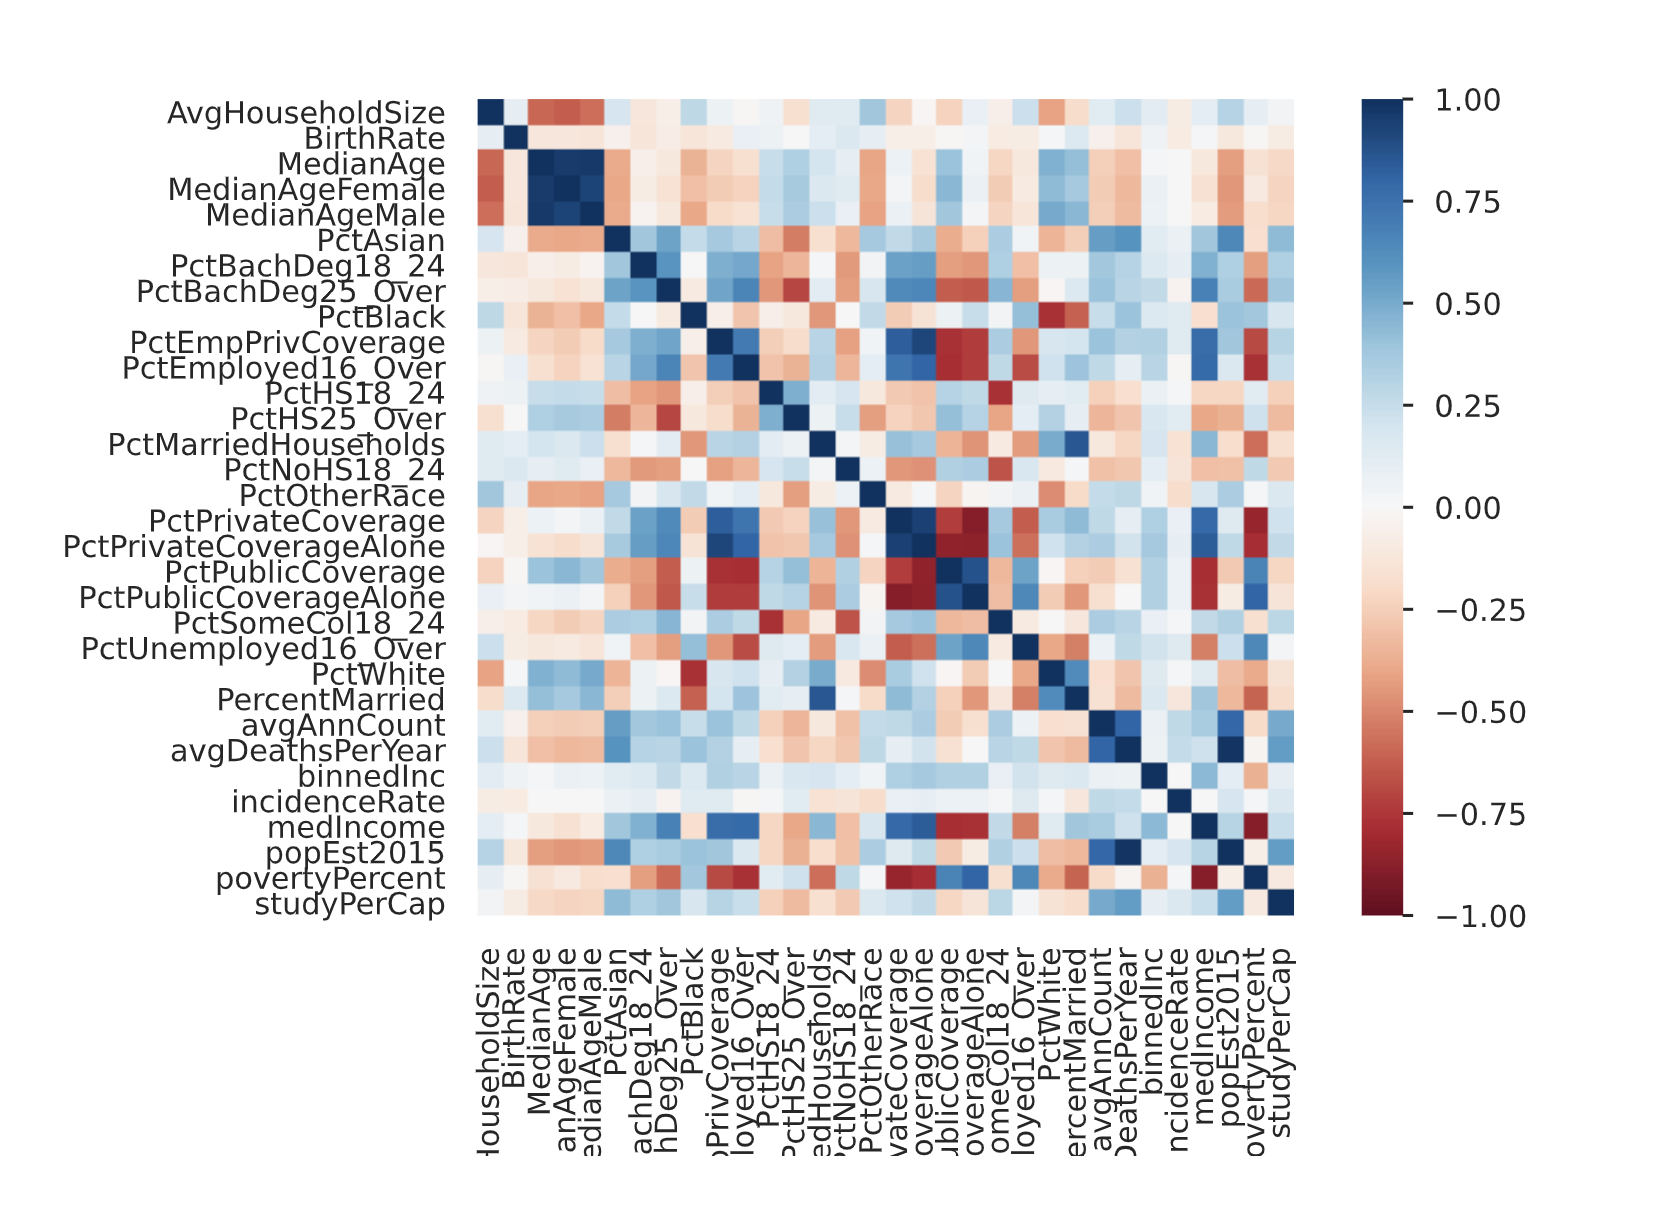

Basado en este mapa, se ha encontrado una correlación mayor a 0.75 entre varios de los siguientes atributos, como por ejemplo

* MedianAge - MedianAgeMale - MedianAgeFemale

* PctPrivateCoverage - PctPrivateCoverageAlone - PctPublicCoverage - PctPublicCoverageAlone

* PctPrivateCoverage - PctEmpPrivCoverage

* PctPrivateCoverageAlone - PctEmpPrivCoverage

* PctPublicCoverage - PctEmpPrivCoverage

* PctPublicCoverageAlone - PctEmpPrivCoverage

* PctEmpPrivCoverage - PctPublicCoverage

* popEst2015 - avgDeathsPerYear

### Conteo de Valores No Nulos por Atributo

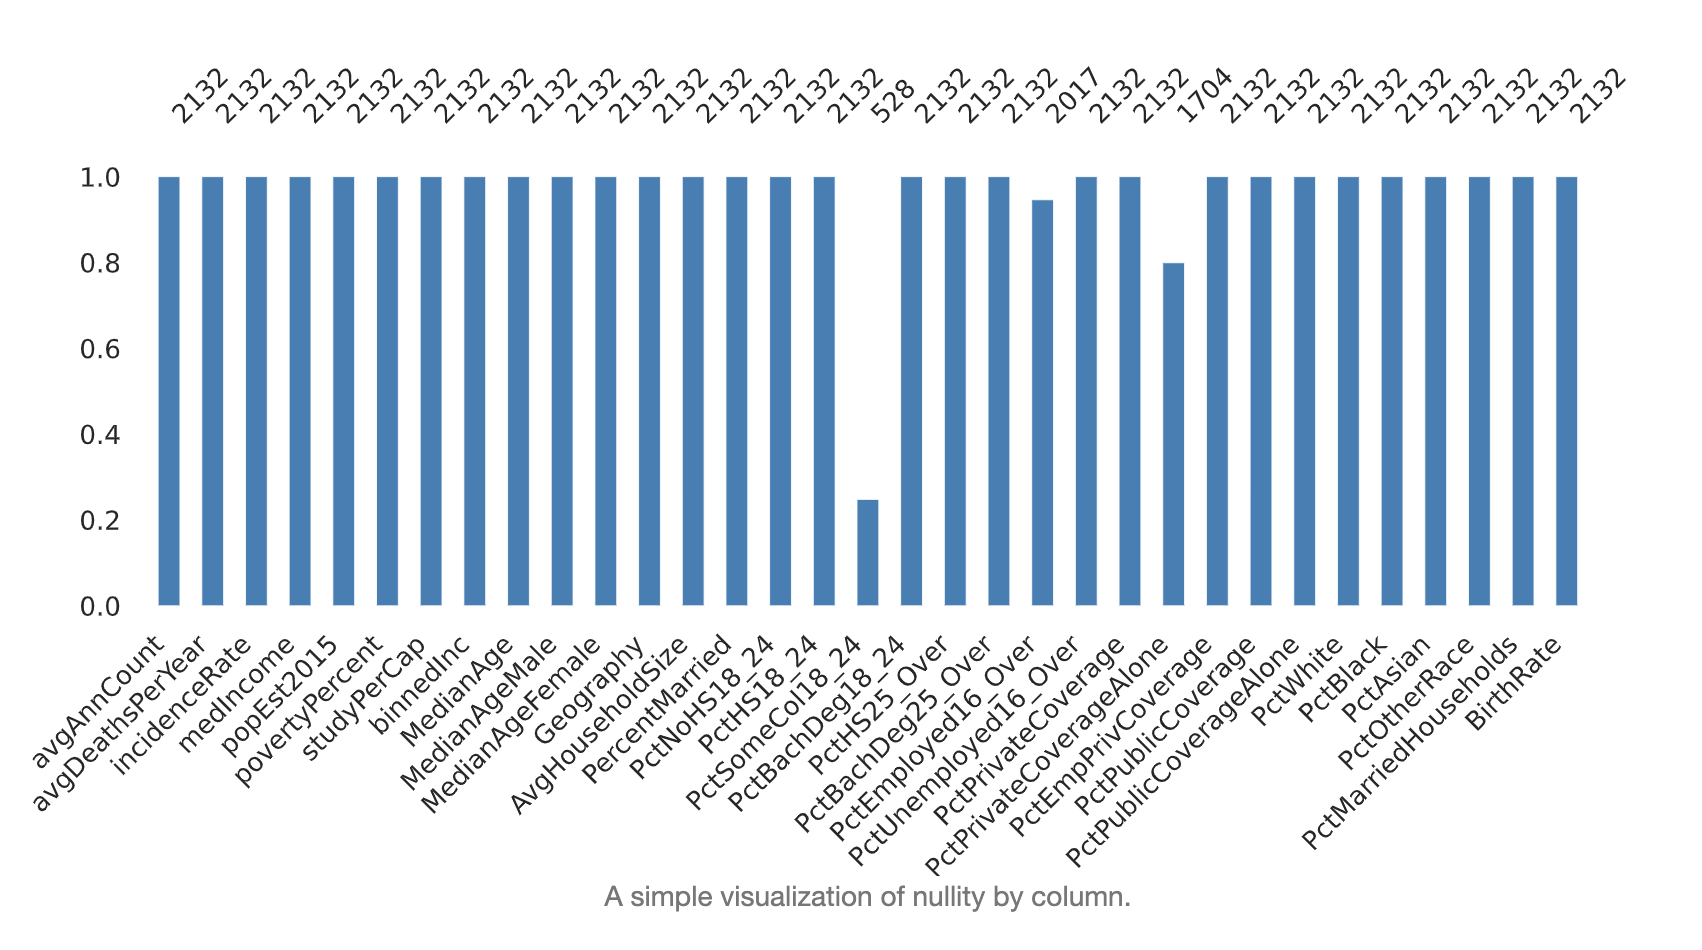

En esta gráfica se puede observar que la gran mayoría de los datos no contiene datos nulos, con la excepción de los 3 atributos mencionados anteriormente, en concreto, para el atributo PctSomeCol18_24, se puede observar que solamente contiene 528 datos.

### Mapa de Calor de Correlación para Valores Nulos



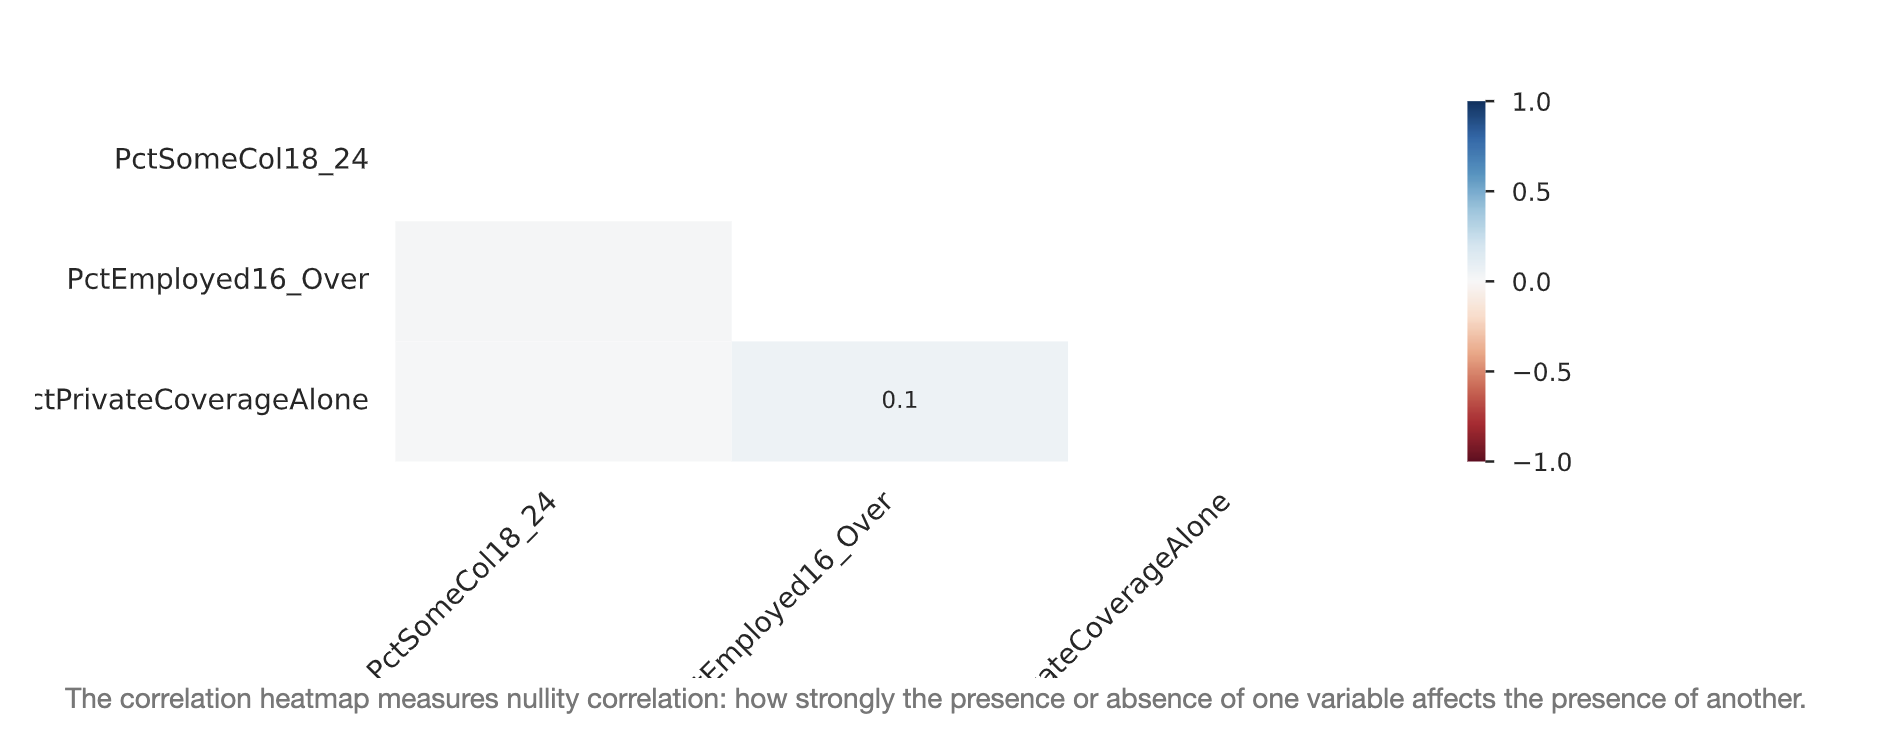

En este gráfico se puede observar que el atributo PctSomeCol18_24, al contener muchos valores nulos, afecta en gran medida los otros atributos con valores nulos, por lo cual, se considera una buena idea eliminar este atributo debido a la gran cantidad de datos que se podría perder ya mencionado en anteriores análisis.

### Análisis de Diagramas de Caja
Para este análisis únicamente observaremos aquellos atributos numéricos que no están delimitados (como por ejemplo los porcentajes), y que no tengan una alta correlación con algún otro dato, con esto se desea observar aquellos atributos que tienen outlliers significativos para una posterior preparación de datos.

In [291]:
avgAnnCount_g = df_train[['avgAnnCount']].melt()
avgDeathsPerYear_g = df_train[['avgDeathsPerYear']].melt()
incidenceRate_g = df_train[['incidenceRate']].melt()
medIncome_g = df_train[['medIncome']].melt()
popEst2015_g = df_train[['popEst2015']].melt()
studyPerCap_g = df_train[['studyPerCap']].melt()
medianAge_g = df_train[['MedianAge']].melt()
avgHouseHoldSize_g = df_train[['AvgHouseholdSize']].melt()
birthRate_g = df_train[['BirthRate']].melt()

Se hicieron los siguientes diagramas de caja, con el objetivo de mirar gráficamente y hacer un estimado de cuántos datos se perderán si se hace una eliminación de outliers

<Axes: xlabel='variable', ylabel='value'>

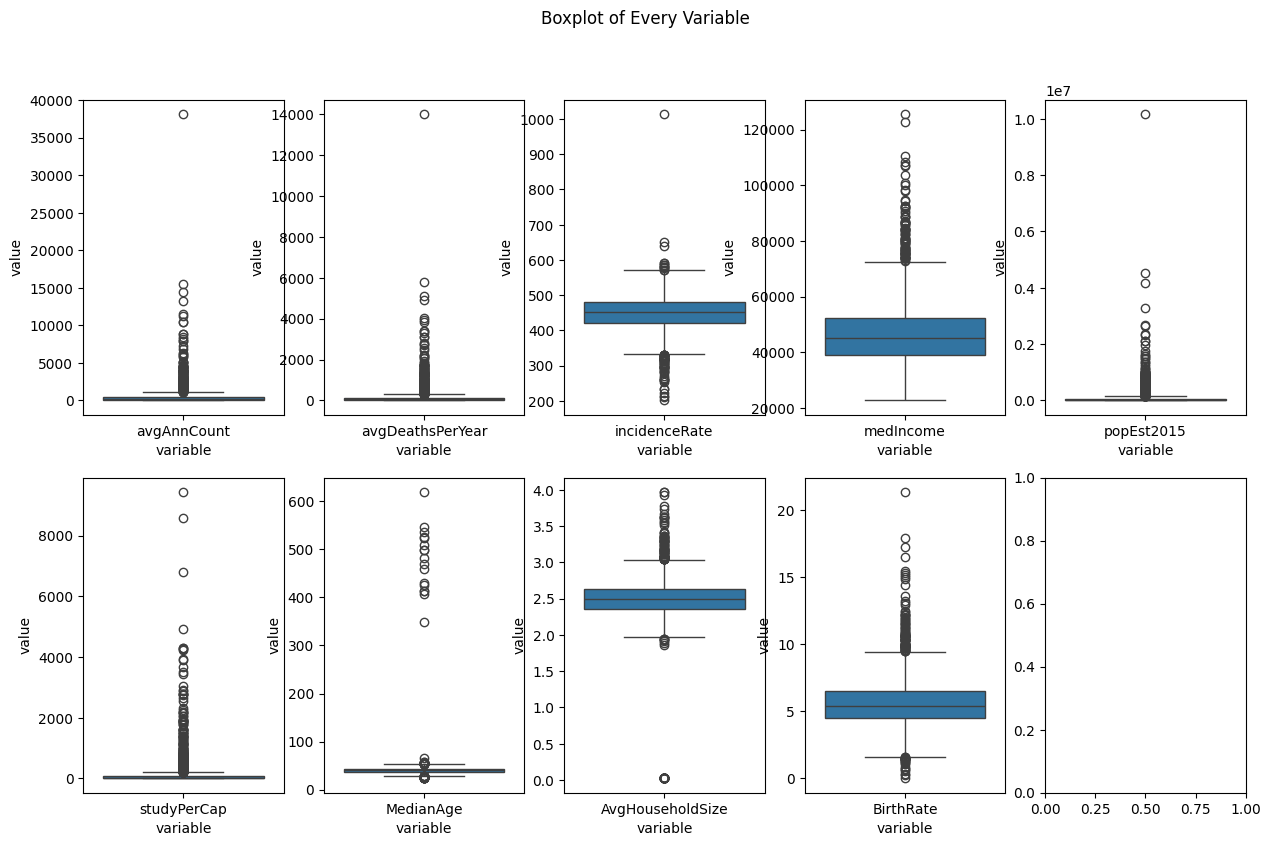

In [292]:
fig, axes = plt.subplots(2,5,figsize=(15,9))
fig.suptitle('Boxplot of Every Variable')
sns.boxplot(x="variable",y="value",data=avgAnnCount_g,ax=axes[0][0])
sns.boxplot(x="variable",y="value",data=avgDeathsPerYear_g,ax=axes[0][1])
sns.boxplot(x="variable",y="value",data=incidenceRate_g,ax=axes[0][2])
sns.boxplot(x="variable",y="value",data=medIncome_g,ax=axes[0][3])
sns.boxplot(x="variable",y="value",data=popEst2015_g,ax=axes[0][4])
sns.boxplot(x="variable",y="value",data=studyPerCap_g,ax=axes[1][0])
sns.boxplot(x="variable",y="value",data=medianAge_g,ax=axes[1][1])
sns.boxplot(x="variable",y="value",data=avgHouseHoldSize_g,ax=axes[1][2])
sns.boxplot(x="variable",y="value",data=birthRate_g,ax=axes[1][3])

Basado en este diagrama, se calcularán cuantos outliers contiene cada atributo

In [293]:
#Primer cuartil
q1_avgAnnCount = df_train['avgAnnCount'].quantile(0.25)
q1_avgDeathsPerYear = df_train['avgDeathsPerYear'].quantile(0.25)
q1_incidenceRate = df_train['incidenceRate'].quantile(0.25)
q1_medIncome = df_train['medIncome'].quantile(0.25)
q1_popEst2015 = df_train['popEst2015'].quantile(0.25)
q1_studyPerCap = df_train['studyPerCap'].quantile(0.25)
q1_medianAge = df_train['MedianAge'].quantile(0.25)
q1_avgHouseHoldSize = df_train['AvgHouseholdSize'].quantile(0.25)
q1_birthRate = df_train['BirthRate'].quantile(0.25)

#Tercer cuartil
q3_avgAnnCount = df_train['avgAnnCount'].quantile(0.75)
q3_avgDeathsPerYear = df_train['avgDeathsPerYear'].quantile(0.75)
q3_incidenceRate = df_train['incidenceRate'].quantile(0.75)
q3_medIncome = df_train['medIncome'].quantile(0.75)
q3_popEst2015 = df_train['popEst2015'].quantile(0.75)
q3_studyPerCap = df_train['studyPerCap'].quantile(0.75)
q3_medianAge = df_train['MedianAge'].quantile(0.75)
q3_avgHouseHoldSize = df_train['AvgHouseholdSize'].quantile(0.75)
q3_birthRate = df_train['BirthRate'].quantile(0.75)

#Rango Intercuartil
iqr_avgAnnCount = q3_avgAnnCount - q1_avgAnnCount
iqr_avgDeathsPerYear = q3_avgDeathsPerYear - q1_avgDeathsPerYear
iqr_incidenceRate = q3_incidenceRate - q1_incidenceRate
iqr_medIncome = q3_medIncome - q1_medIncome
iqr_popEst2015 = q3_popEst2015 - q1_popEst2015
iqr_studyPerCap = q3_studyPerCap - q1_studyPerCap
iqr_medianAge = q3_medianAge - q1_medianAge
iqr_avgHouseHoldSize = q3_avgHouseHoldSize - q1_avgHouseHoldSize
iqr_birthRate = q3_birthRate - q1_birthRate

#Límite inferior

lower_avgAnnCount = q1_avgAnnCount - 1.5*iqr_avgAnnCount
lower_avgDeathsPerYear = q1_avgDeathsPerYear - 1.5*iqr_avgDeathsPerYear
lower_incidenceRate = q1_incidenceRate - 1.5*iqr_incidenceRate
lower_medIncome = q1_medIncome - 1.5*iqr_medIncome
lower_popEst2015 = q1_popEst2015 - 1.5*iqr_popEst2015
lower_studyPerCap = q1_studyPerCap - 1.5*iqr_studyPerCap
lower_medianAge = q1_medianAge - 1.5*iqr_medianAge
lower_avgHouseHoldSize = q1_avgHouseHoldSize - 1.5*iqr_avgHouseHoldSize
lower_birthRate = q1_birthRate - 1.5*iqr_birthRate

#Limite superior

upper_avgAnnCount = q3_avgAnnCount + 1.5*iqr_avgAnnCount
upper_avgDeathsPerYear = q3_avgDeathsPerYear + 1.5*iqr_avgDeathsPerYear
upper_incidenceRate = q3_incidenceRate + 1.5*iqr_incidenceRate
upper_medIncome = q3_medIncome + 1.5*iqr_medIncome
upper_popEst2015 = q3_popEst2015 + 1.5*iqr_popEst2015
upper_studyPerCap = q3_studyPerCap + 1.5*iqr_studyPerCap
upper_medianAge = q3_medianAge + 1.5*iqr_medianAge
upper_avgHouseHoldSize = q3_avgHouseHoldSize + 1.5*iqr_avgHouseHoldSize
upper_birthRate = q3_birthRate + 1.5*iqr_birthRate



In [294]:
#Definir rangos sin outliers (los que están dentro de la caja)
range_avgAnnCount = df_train[(df_train['avgAnnCount'] >= lower_avgAnnCount) & (df_train['avgAnnCount'] <= upper_avgAnnCount)]
range_avgDeathsPerYear = df_train[(df_train['avgDeathsPerYear'] >= lower_avgDeathsPerYear) & (df_train['avgDeathsPerYear'] <= upper_avgDeathsPerYear)]
range_incidenceRate = df_train[(df_train['incidenceRate'] >= lower_incidenceRate) & (df_train['incidenceRate'] <= upper_incidenceRate)]
range_medIncome = df_train[(df_train['medIncome'] >= lower_medIncome) & (df_train['medIncome'] <= upper_medIncome)]
range_popEst2015 = df_train[(df_train['popEst2015'] >= lower_popEst2015) & (df_train['popEst2015'] <= upper_popEst2015)]
range_studyPerCap = df_train[(df_train['studyPerCap'] >= lower_studyPerCap) & (df_train['studyPerCap'] <= upper_studyPerCap)]
range_medianAge = df_train[(df_train['MedianAge'] >= lower_medianAge) & (df_train['MedianAge'] <= upper_medianAge)]
range_avgHouseHoldSize = df_train[(df_train['AvgHouseholdSize'] >= lower_avgHouseHoldSize) & (df_train['AvgHouseholdSize'] <= upper_avgHouseHoldSize)]
range_birthRate = df_train[(df_train['BirthRate'] >= lower_birthRate) & (df_train['BirthRate'] <= upper_birthRate)]

In [295]:
#Calcular número de Outliers
outliers_avgAnnCount = df_train.shape[0] - range_avgAnnCount.shape[0]
outliers_avgDeathsPerYear = df_train.shape[0] - range_avgDeathsPerYear.shape[0]
outliers_incidenceRate = df_train.shape[0] - range_incidenceRate.shape[0]
outliers_medIncome = df_train.shape[0] - range_medIncome.shape[0]
outliers_popEst2015 = df_train.shape[0] - range_popEst2015.shape[0]
outliers_studyPerCap = df_train.shape[0] - range_studyPerCap.shape[0]
outliers_medianAge = df_train.shape[0] - range_medianAge.shape[0]
outliers_avgHouseHoldSize = df_train.shape[0] - range_avgHouseHoldSize.shape[0]
outliers_birthRate = df_train.shape[0] - range_birthRate.shape[0]

In [296]:
print("Número de Outliers de avgAnnCount: " + str(outliers_avgAnnCount))
print("Número de Outliers de avgDeathsPerYear: " + str(outliers_avgDeathsPerYear))
print("Número de Outliers de incidenceRate: " + str(outliers_incidenceRate))
print("Número de Outliers de medIncome: " + str(outliers_medIncome))
print("Número de Outliers de popEst2015: " + str(outliers_popEst2015))
print("Número de Outliers de studyPerCap: " + str(outliers_studyPerCap))
print("Número de Outliers de medianAge: " + str(outliers_medianAge))
print("Número de Outliers de avgHouseHoldSize: " + str(outliers_avgHouseHoldSize))
print("Número de Outliers de birthRate: " + str(outliers_birthRate))

Número de Outliers de avgAnnCount: 333
Número de Outliers de avgDeathsPerYear: 261
Número de Outliers de incidenceRate: 68
Número de Outliers de medIncome: 86
Número de Outliers de popEst2015: 287
Número de Outliers de studyPerCap: 366
Número de Outliers de medianAge: 61
Número de Outliers de avgHouseHoldSize: 129
Número de Outliers de birthRate: 117


Debido a que en varios atributos como por ejemplo avgAnnCount, avgDeathsPerYear, popEst2015, studyPerCap avgHouseHoldSize y birthRate se pierden más de 100 datos dado que son identificados como outliers, está detección no será tenido en cuenta al priorizar la cantidad de datos.

Por lo tanto, la detección de outliers se realizará con los atributos incidenceRate, medIncome y medianAge

## PREPARACIÓN DE DATOS

### Eliminación de Atributos con Valores Nulos
En primer lugar, se hará una eliminación de atributos que poseen valores nulos, de los cuales se pudo observar en la etapa de entendimiento y corresponde a 3 atributos, la razón de eliminar estos atributos es que si se hace una eliminación de valores nulos, se eliminaría una gran cantidad de datos (sólo habría 528 para el entrenamiento), por lo que hay pocos datos, incluyendo los datos nulos

In [297]:
df_att_clean = df_train.drop(['PctSomeCol18_24','PctPrivateCoverageAlone','PctEmployed16_Over'],axis=1)

### Eliminación de Valores del Atributo MedianAge

En este paso de la limpieza se eliminaron unos cuantos valores pertenecientes al atributo MedianAge, el cual corresponde a la edad mediana de los residentes del condado, dado que se encontraron valores de edad inconsistentes mayores a 100 años.

Por ende, estableció un límite de hasta 70 años, un límite que se estableció debido a que es un valor máximo de 2 atributos con correlación, los cuales son MedianAgeMale y MedianAgeFemale


In [298]:
df_train_ma = df_att_clean[df_att_clean['MedianAge']<70]

In [299]:
loss_ma = df_att_clean.shape[0] - df_train_ma.shape[0]
print("Se eliminaron "+ str(loss_ma) +" datos luego de la limpieza de valores inconsistentes de MedianAge")

Se eliminaron 17 datos luego de la limpieza de valores inconsistentes de MedianAge


In [300]:
df_train_ma['binnedInc']

0       (34218.1, 37413.8]
1       (48021.6, 51046.4]
2       (54545.6, 61494.5]
3         [22640, 34218.1]
4       (37413.8, 40362.7]
               ...        
2127      [22640, 34218.1]
2128     (61494.5, 125635]
2129     (61494.5, 125635]
2130    (54545.6, 61494.5]
2131    (54545.6, 61494.5]
Name: binnedInc, Length: 2115, dtype: object

### Transformación de Datos Categóricos

Debido a que se encontraron 2 datos categóricos (uno de ellos es tipo texto), ambos se manejaran mediante un label encoder, el cual reemplaza cada dato único por un número.

Otra razón por la cual se utilizará un label encoder es debido a que en comparación con otros tipos de encoding como one-hot encoding, se podría aumentar la dimensionalidad del problema, por lo que aumentaría el error en los resultados

In [301]:
df_cat_transformed = df_train_ma

#### Variable BinnedInc
A pesar de que este atributo es categórico y contiene datos numéricos, en realidad únicamente posee 10 valores únicos en todos los datos, por lo que se espera que luego de realizar el encoding, los datos sean reemplazados por números del 1 al 9

In [302]:
binnedIncEncoder = LabelEncoder()

In [303]:
#Comprobar asignación de valores únicos
df_cat_transformed['binnedInc'].unique()

array(['(34218.1, 37413.8]', '(48021.6, 51046.4]', '(54545.6, 61494.5]',
       '[22640, 34218.1]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(51046.4, 54545.6]', '(61494.5, 125635]', '(42724.4, 45201]',
       '(45201, 48021.6]'], dtype=object)

A cada valor de esta tabla, se le asignará el número en orden (por ejemplo al primer valor el 0, el segundo valor el 1, etc...)

In [304]:
#Comprobar tamaño de valores únicos
df_cat_transformed['binnedInc'].unique().shape

(10,)

In [305]:
df_cat_transformed['binnedInc'] = binnedIncEncoder.fit_transform(df_cat_transformed['binnedInc'])

<ipython-input-305-6a3d93b42c7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_transformed['binnedInc'] = binnedIncEncoder.fit_transform(df_cat_transformed['binnedInc'])


In [306]:
#Comprobar transformación
df_cat_transformed['binnedInc'].unique()

array([0, 5, 7, 9, 1, 2, 6, 8, 3, 4])

#### Variable Geography

Debido a la variabilidad alta que tiene este atributo, se espera que en el label encoding, los datos sean reemplazados por números del 0 al tamaño del dataset menos 1, cada 1 con frecuencia 1 ya que existe una variabilidad del 100 %

In [307]:
geographyEncoder = LabelEncoder()

In [308]:
#Breve resumen de datos únicos
df_cat_transformed['Geography'].unique()

array(['Gregory County, South Dakota', 'Taylor County, Wisconsin',
       'Bowman County, North Dakota', ..., 'Essex County, Massachusetts',
       'Rockingham County, Virginia', 'Denver County, Colorado'],
      dtype=object)

In [309]:
df_cat_transformed['Geography'].unique().shape

(2115,)

Hay 2115 datos, por lo que el resultado del encoder tendrá un número del 0 al 2114

In [310]:
df_cat_transformed['Geography'] = geographyEncoder.fit_transform(df_cat_transformed['Geography'])

<ipython-input-310-4cae2b6028df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_transformed['Geography'] = geographyEncoder.fit_transform(df_cat_transformed['Geography'])


In [311]:
#Comprobar transformación
df_cat_transformed['Geography'].unique()

array([ 766, 1876,  161, ...,  593, 1654,  515])

In [312]:
df_cat_transformed['Geography'].unique().shape

(2115,)

In [313]:
#Comprobar tipos de dato luego de transformación
df_cat_transformed.dtypes

avgAnnCount               float64
avgDeathsPerYear            int64
incidenceRate             float64
medIncome                   int64
popEst2015                  int64
povertyPercent            float64
studyPerCap               float64
binnedInc                   int64
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
Geography                   int64
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate     

Con esto, se comprueba que todos los datos han sido transformados en números, por lo que ya no se tiene el problema de representación de datos como categórica.

### Eliminación de Outliers

En esta fase de detección se eliminarán outliers únicamente de incidenceRate, medIncome y medianAge, de acuerdo a lo establecido en el entendimiento de los datos

In [314]:
#Filtrar datos sin outliers - incidence rate
df_no_ir_outliers = df_cat_transformed[((df_cat_transformed['incidenceRate'] >= lower_incidenceRate) & (df_cat_transformed['incidenceRate'] <= upper_incidenceRate))]
#Filtrar datos sin outliers - medIncome
df_no_mi_outliers = df_no_ir_outliers[(df_no_ir_outliers['medIncome'] >= lower_medIncome) & (df_no_ir_outliers['medIncome'] <= upper_medIncome)]
#Filtrar datos sin outliers - MedianAge
df_no_ma_outliers = df_no_mi_outliers[((df_no_mi_outliers['MedianAge'] >= lower_medianAge) & (df_no_mi_outliers['MedianAge'] <= upper_medianAge))]

In [315]:
df_cat_transformed.shape[0] - df_no_ma_outliers.shape[0]

189

En total, se eliminaron 189 datos correspondientes a los outliers de los 3 atributos mencionados anteriormente

### Datos Obtenidos Luegos de la Limpieza

In [316]:
df_clean = df_no_ma_outliers

In [317]:
df_clean.shape

(1926, 31)

En total, luego de la limpieza, se definió que se utilizarán 1926 datos, con 30 atributos a probar

## MODELADO

###ELECCIÓN DE VARIABLES

In [318]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [319]:
df_train = df_clean

In [320]:
df_train.shape

(1926, 31)

In [321]:
df_train.sample(5)

avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
1892    83.000000                34     374.900000      35491       17142   
1618   691.000000               231     374.300000      52628      148686   
870   1962.667684                15     453.549422      46961        6343   
1037    58.000000                29     475.000000      47606       10524   
1686   887.000000               375     401.000000      57408      249672   

      povertyPercent  studyPerCap  binnedInc  MedianAge  MedianAgeMale  \
1892            23.7     0.000000          0       39.8           39.6   
1618            14.2    60.530245          6       44.4           42.7   
870             12.4     0.000000          4       44.2           41.1   
1037            17.4     0.000000          4       40.1           38.9   
1686            11.9    92.120863          7       35.0           34.3   

      MedianAgeFemale  Geography  AvgHouseholdSize  PercentMarried  \
1892             39.9        606              2.86            42.0   
1618             46.2       1703              2.35            47.6   
870              48.8        583              2.08            51.0   
1037             41.0       1864              2.55            56.7   
1686             35.7        120              2.75            59.9   

      PctNoHS18_24  PctHS18_24  PctBachDeg18_24  PctHS25_Over  \
1892          32.7        32.1              1.0          37.7   
1618          25.2        25.9              6.9          21.4   
870           20.9        27.9              8.4          32.2   
1037          31.2        36.3              0.0          46.6   
1686          14.7        39.8              9.7          30.8   

      PctBachDeg25_Over  PctUnemployed16_Over  PctPrivateCoverage  \
1892                8.8                   7.2                55.5   
1618               20.4                   7.9                60.1   
870                15.2                   4.3                78.3   
1037                6.5                   9.6                61.4   
1686               19.9                   4.2                68.5   

      PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
1892                34.9               38.9                    19.5   
1618                36.3               35.9                    19.7   
870                 44.6               31.7                    13.2   
1037                40.5               37.1                    20.1   
1686                52.6               28.3                    16.5   

       PctWhite   PctBlack  PctAsian  PctOtherRace  PctMarriedHouseholds  \
1892  70.608845  24.773119  0.241241      2.349225             45.847176   
1618  83.244283   0.781059  1.213394      8.915219             43.681655   
870   90.280811   3.837754  0.327613      1.700468             51.063830   
1037  96.857143   0.990476  0.238095      0.438095             55.711127   
1686  87.928950   1.490777  3.468543      2.515554             60.574297   

      BirthRate  deathRate  
1892   3.950011      151.9  
1618   4.017425      126.1  
870    7.773512      149.6  
1037   3.788225      232.3  
1686   5.821267      166.2

In [322]:
features = ["avgAnnCount","avgDeathsPerYear", "incidenceRate", "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "MedianAge", "MedianAgeMale", "MedianAgeFemale", "AvgHouseholdSize" , "PercentMarried", "PctNoHS18_24", "PctHS18_24", "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "Geography", "binnedInc", "PctPrivateCoverage",  "PctEmpPrivCoverage", "PctPublicCoverageAlone", "PctBlack","PctWhite", "PctAsian", "PctOtherRace", "PctMarriedHouseholds", "BirthRate", "PctUnemployed16_Over","PctPublicCoverage"]

In [323]:
df_train[["deathRate"]+features].isnull().sum() / df_train.shape[0]

deathRate                 0.0
avgAnnCount               0.0
avgDeathsPerYear          0.0
incidenceRate             0.0
medIncome                 0.0
popEst2015                0.0
povertyPercent            0.0
studyPerCap               0.0
MedianAge                 0.0
MedianAgeMale             0.0
MedianAgeFemale           0.0
AvgHouseholdSize          0.0
PercentMarried            0.0
PctNoHS18_24              0.0
PctHS18_24                0.0
PctBachDeg18_24           0.0
PctHS25_Over              0.0
PctBachDeg25_Over         0.0
Geography                 0.0
binnedInc                 0.0
PctPrivateCoverage        0.0
PctEmpPrivCoverage        0.0
PctPublicCoverageAlone    0.0
PctBlack                  0.0
PctWhite                  0.0
PctAsian                  0.0
PctOtherRace              0.0
PctMarriedHouseholds      0.0
BirthRate                 0.0
PctUnemployed16_Over      0.0
PctPublicCoverage         0.0
dtype: float64

Se observan que no hay datos nulos, por lo tanto hay un rango de completitud de 1


### Matriz y Mapa de Correlación entre Todas las Variables

<Axes: >

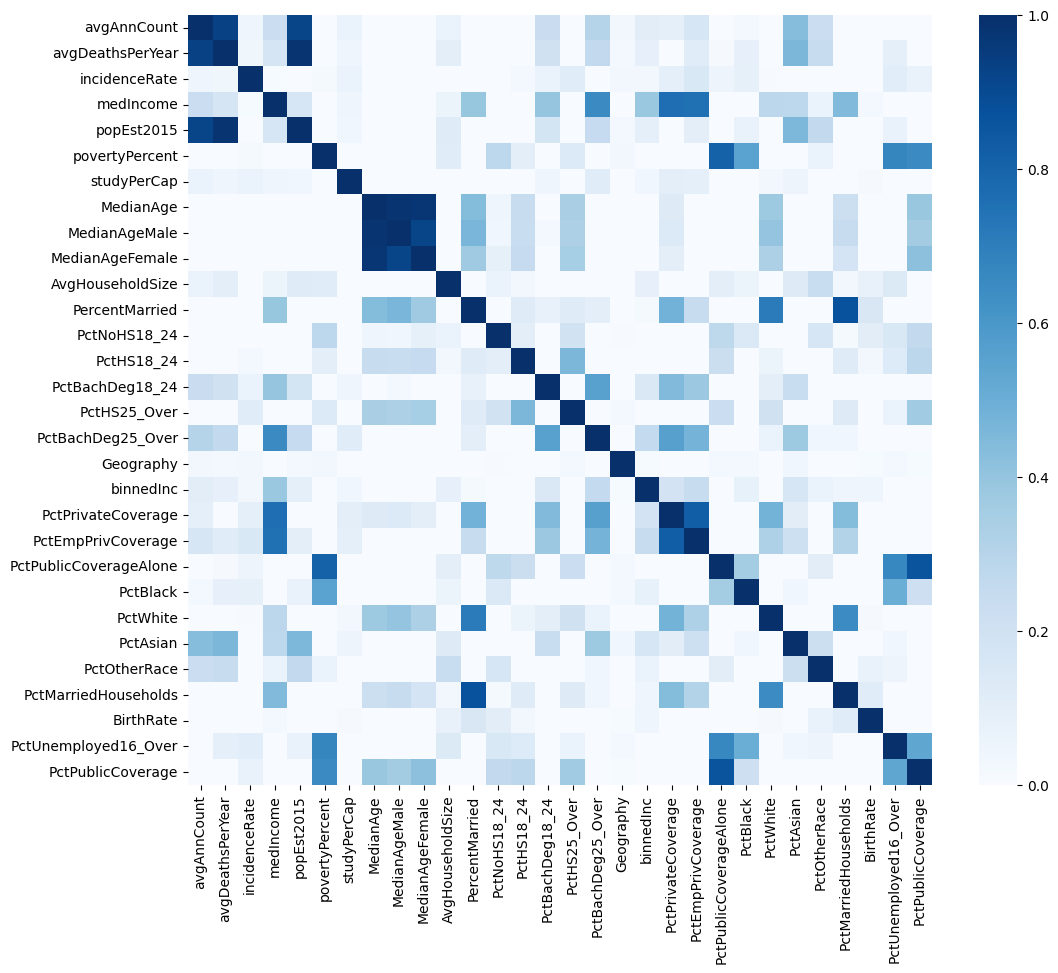

In [324]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train[features].corr(), cmap="Blues", vmin=0, vmax=1)

In [325]:
df_train[features].corr()

avgAnnCount  avgDeathsPerYear  incidenceRate  \
avgAnnCount                1.000000          0.931849       0.043817   
avgDeathsPerYear           0.931849          1.000000       0.039995   
incidenceRate              0.043817          0.039995       1.000000   
medIncome                  0.224975          0.168932       0.009070   
popEst2015                 0.923131          0.981583       0.000898   
povertyPercent            -0.097187         -0.016634       0.015673   
studyPerCap                0.068259          0.046635       0.062922   
MedianAge                 -0.145427         -0.182813      -0.006491   
MedianAgeMale             -0.146189         -0.182888      -0.019122   
MedianAgeFemale           -0.146885         -0.183293      -0.000108   
AvgHouseholdSize           0.067452          0.103603      -0.105932   
PercentMarried            -0.113339         -0.201877      -0.114234   
PctNoHS18_24              -0.124051         -0.108545      -0.167146   
PctHS18_24                -0.172095         -0.135289       0.024536   
PctBachDeg18_24            0.231992          0.199798       0.067279   
PctHS25_Over              -0.294471         -0.274554       0.113726   
PctBachDeg25_Over          0.303539          0.259269      -0.040840   
Geography                  0.029507          0.024317       0.031708   
binnedInc                  0.108345          0.084128       0.028878   
PctPrivateCoverage         0.091410          0.001457       0.091713   
PctEmpPrivCoverage         0.161943          0.114412       0.150993   
PctPublicCoverageAlone    -0.064205          0.012521       0.052426   
PctBlack                   0.026039          0.085794       0.088048   
PctWhite                  -0.119939         -0.182013       0.004190   
PctAsian                   0.430917          0.460671      -0.011524   
PctOtherRace               0.223887          0.240088      -0.229180   
PctMarriedHouseholds      -0.129611         -0.188960      -0.157578   
BirthRate                 -0.018168         -0.057618      -0.098512   
PctUnemployed16_Over      -0.002031          0.094056       0.111420   
PctPublicCoverage         -0.155264         -0.109873       0.070650   

                        medIncome  popEst2015  povertyPercent  studyPerCap  \
avgAnnCount              0.224975    0.923131       -0.097187     0.068259   
avgDeathsPerYear         0.168932    0.981583       -0.016634     0.046635   
incidenceRate            0.009070    0.000898        0.015673     0.062922   
medIncome                1.000000    0.167625       -0.827203     0.049765   
popEst2015               0.167625    1.000000       -0.013027     0.036568   
povertyPercent          -0.827203   -0.013027        1.000000    -0.061919   
studyPerCap              0.049765    0.036568       -0.061919     1.000000   
MedianAge               -0.102695   -0.197625       -0.215479    -0.018182   
MedianAgeMale           -0.074450   -0.194716       -0.237180    -0.027978   
MedianAgeFemale         -0.141576   -0.199597       -0.168006    -0.010982   
AvgHouseholdSize         0.058085    0.117295        0.115370    -0.020442   
PercentMarried           0.391896   -0.176548       -0.654078    -0.017801   
PctNoHS18_24            -0.281777   -0.093650        0.278855    -0.088684   
PctHS18_24              -0.196111   -0.129485        0.101813    -0.040028   
PctBachDeg18_24          0.398085    0.179741       -0.360288     0.050721   
PctHS25_Over            -0.378287   -0.276983        0.138633    -0.078436   
PctBachDeg25_Over        0.650509    0.251197       -0.506957     0.117082   
Geography               -0.004340    0.022516        0.030678    -0.028218   
binnedInc                0.384202    0.092172       -0.130827     0.035754   
PctPrivateCoverage       0.759738   -0.007166       -0.836573     0.100259   
PctEmpPrivCoverage       0.752403    0.101245       -0.684601     0.096915   
PctPublicCoverageAlone  -0.747829    0.002697        0.807031    -0.056662 

Variables como avgAnnCount,avgDeathsPerYear y popEst2015 tienen una correlación mayor a 0.9, por lo que el tenerlas todas para construir el modelo puede afectar a la regresión. También hay mucha correlación con las variables que manejan el porcentaje de cobertura privada de salud, por lo que lo ideal sería dejar uno de ellos. En el caso de la edad media, también hay alta correlación entre la edad media de los hombres y mujeres, y la edad media en general, por lo que se deja nad más la edad media


In [326]:
#features2 = ["avgAnnCount","avgDeathsPerYear", "incidenceRate", "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "MedianAge", "MedianAgeMale", "MedianAgeFemale", "AvgHouseholdSize" , "PercentMarried", "PctNoHS18_24", "PctHS18_24", "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "Geography", "binnedInc", "PctPrivateCoverage",  "PctEmpPrivCoverage", "PctPublicCoverageAlone", "PctBlack","PctWhite", "PctAsian", "PctOtherRace", "PctMarriedHouseholds", "BirthRate", "PctUnemployed16_Over","PctPublicCoverage"]
#0.47
#features2 = [  "incidenceRate", "povertyPercent",    "PctHS25_Over",   "PctUnemployed16_Over"]
#0.41
features2 = ["avgDeathsPerYear", "incidenceRate", "povertyPercent",  "studyPerCap", "MedianAge", "PctMarriedHouseholds",  "AvgHouseholdSize" ,  "PctNoHS18_24", "PctHS18_24",  "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "binnedInc", "PctPrivateCoverage",   "PctAsian", "PctOtherRace",  "BirthRate"]
#0.46 en test
#features2 = ["avgDeathsPerYear", "incidenceRate", "povertyPercent",  "studyPerCap", "MedianAge", "PctMarriedHouseholds",  "AvgHouseholdSize" ,  "PctNoHS18_24", "PctHS18_24",  "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "binnedInc", "Geography", "PctWhite", "PctBlack" ,"PctPrivateCoverage",   "PctAsian", "PctOtherRace",  "BirthRate", "PctUnemployed16_Over"]
#0.46 en train

### Matriz y Mapa de Correlación entre Variables Escogidas

<Axes: >

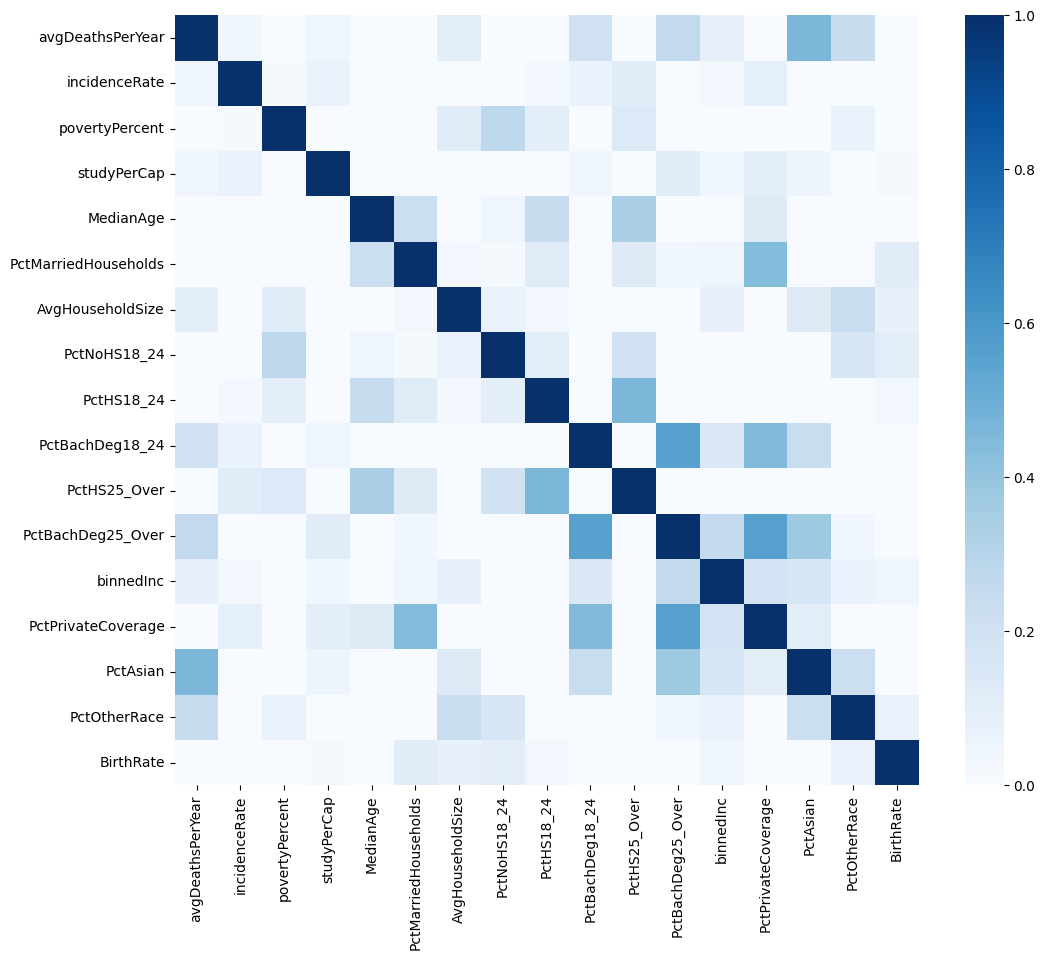

In [327]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train[features2].corr(), cmap="Blues", vmin=0, vmax=1)

In [328]:
df_train[features2].corr()

avgDeathsPerYear  incidenceRate  povertyPercent  \
avgDeathsPerYear              1.000000       0.039995       -0.016634   
incidenceRate                 0.039995       1.000000        0.015673   
povertyPercent               -0.016634       0.015673        1.000000   
studyPerCap                   0.046635       0.062922       -0.061919   
MedianAge                    -0.182813      -0.006491       -0.215479   
PctMarriedHouseholds         -0.188960      -0.157578       -0.598157   
AvgHouseholdSize              0.103603      -0.105932        0.115370   
PctNoHS18_24                 -0.108545      -0.167146        0.278855   
PctHS18_24                   -0.135289       0.024536        0.101813   
PctBachDeg18_24               0.199798       0.067279       -0.360288   
PctHS25_Over                 -0.274554       0.113726        0.138633   
PctBachDeg25_Over             0.259269      -0.040840       -0.506957   
binnedInc                     0.084128       0.028878       -0.130827   
PctPrivateCoverage            0.001457       0.091713       -0.836573   
PctAsian                      0.460671      -0.011524       -0.077100   
PctOtherRace                  0.240088      -0.229180        0.069743   
BirthRate                    -0.057618      -0.098512       -0.030294   

                      studyPerCap  MedianAge  PctMarriedHouseholds  \
avgDeathsPerYear         0.046635  -0.182813             -0.188960   
incidenceRate            0.062922  -0.006491             -0.157578   
povertyPercent          -0.061919  -0.215479             -0.598157   
studyPerCap              1.000000  -0.018182             -0.047621   
MedianAge               -0.018182   1.000000              0.219293   
PctMarriedHouseholds    -0.047621   0.219293              1.000000   
AvgHouseholdSize        -0.020442  -0.357103              0.030024   
PctNoHS18_24            -0.088684   0.049243              0.016085   
PctHS18_24              -0.040028   0.243316              0.119534   
PctBachDeg18_24          0.050721   0.001418             -0.025027   
PctHS25_Over            -0.078436   0.339318              0.126405   
PctBachDeg25_Over        0.117082  -0.129263              0.036366   
binnedInc                0.035754  -0.121402              0.044970   
PctPrivateCoverage       0.100259   0.127379              0.440163   
PctAsian                 0.054427  -0.277875             -0.165485   
PctOtherRace            -0.041552  -0.300266             -0.062212   
BirthRate                0.013377  -0.102139              0.113553   

                      AvgHouseholdSize  PctNoHS18_24  PctHS18_24  \
avgDeathsPerYear              0.103603     -0.108545   -0.135289   
incidenceRate                -0.105932     -0.167146    0.024536   
povertyPercent                0.115370      0.278855    0.101813   
studyPerCap                  -0.020442     -0.088684   -0.040028   
MedianAge                    -0.357103      0.049243    0.243316   
PctMarriedHouseholds          0.030024      0.016085    0.119534   
AvgHouseholdSize              1.000000      0.070139    0.030727   
PctNoHS18_24                  0.070139      1.000000    0.099660   
PctHS18_24                    0.030727      0.099660    1.000000   
PctBachDeg18_24              -0.083902     -0.357816   -0.393187   
PctHS25_Over                 -0.127133      0.194813    0.458123   
PctBachDeg25_Over            -0.009912     -0.388630   -0.414208   
binnedInc                     0.084750     -0.054060   -0.081447   
PctPrivateCoverage           -0.176245     -0.417975   -0.232146   
PctAsian                      0.127810     -0.192407   -0.192284   
PctOtherRace                  0.236566      0.161483   -0.078334   
BirthRate                     0.077870      0.107988    0.031123   

                      PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
avgDeathsPerYear             0.199798     -0.274554           0.259269   
incidenceRate                0.067279      0.113726          -0.040840   

In [329]:
total_rows = df_train.shape[0]
total_rows

1926

In [330]:
duplicated_rows = df_train.loc[df_train.duplicated(subset=features2, keep=False)].shape[0]
duplicated_rows

0

In [331]:
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 0.0000%


Se comprobó que no hay duplicados

###Construcción del modelo de regresión lineal y cálculo de sus métricas de calidad (Luis Plazas)

#### División de datos en entrenamiento y prueba (70-30)

Se escogió la división de datos 70-30

In [332]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features2], df_train["deathRate"], test_size=0.3, random_state=1)

In [333]:
X_train.shape, y_train.shape

((1348, 17), (1348,))

In [334]:
X_test.shape, y_test.shape

((578, 17), (578,))

In [335]:
regression = LinearRegression()

In [336]:
regression.fit(X_train, y_train)

LinearRegression()

#### Cálculo de coeficientes de regresión - datos de entrenamiento

In [337]:
pd.DataFrame({"columns": features2, "coef": regression.coef_})

columns      coef
0       avgDeathsPerYear -0.000811
1          incidenceRate  0.225714
2         povertyPercent  0.363401
3            studyPerCap -0.001243
4              MedianAge -0.264293
5   PctMarriedHouseholds -0.425944
6       AvgHouseholdSize -0.369781
7           PctNoHS18_24 -0.237578
8             PctHS18_24  0.320478
9        PctBachDeg18_24 -0.145593
10          PctHS25_Over  0.162057
11     PctBachDeg25_Over -1.261296
12             binnedInc  0.392621
13    PctPrivateCoverage -0.476070
14              PctAsian -0.288654
15          PctOtherRace -0.650677
16             BirthRate -0.360638

#### Cálculo del intercepto en la función de regresión

In [338]:
regression.intercept_

142.43900864072037

#### Aproximación gráfica de regresión a cada atributo

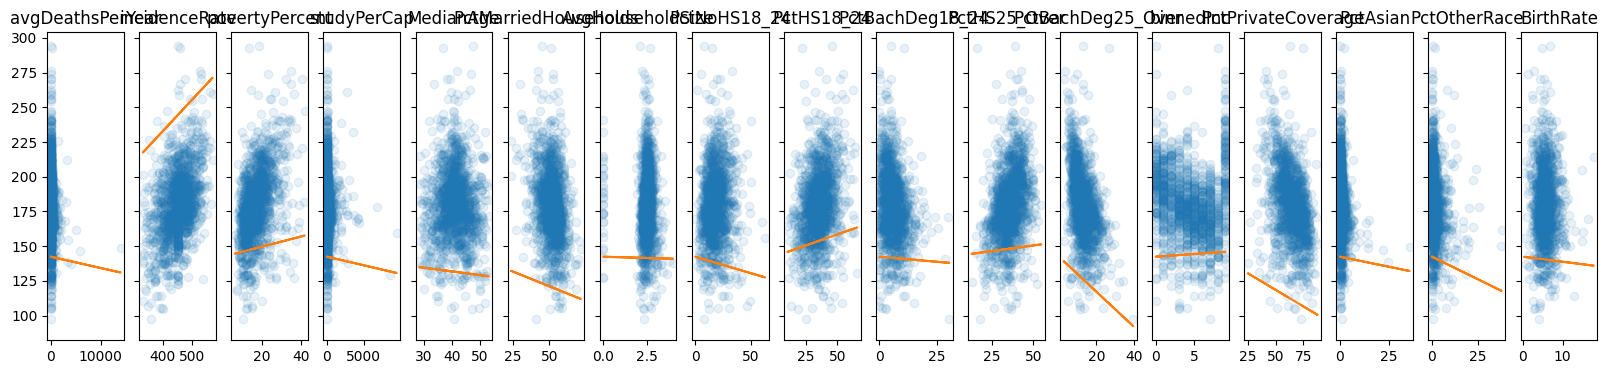

In [339]:
f, axs = plt.subplots(1, len(features2), sharey=True, figsize=(20, 4))

for i in range(len(features2)):
    col = features2[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

#### Cálculo de métricas de calidad

In [340]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 14.017419956923275
Test: 14.9707976877035


In [341]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 19.124932824791617
Test: 19.27487791746467


In [342]:
print("Train:", (r2_score(y_train, regression.predict(X_train))))
print("Test:", (r2_score(y_test, regression.predict(X_test))))


Train: 0.458012350147162
Test: 0.46152158754045125


#### Aproximaciones numéricas al atributo deathRate en el conjunto de prueba

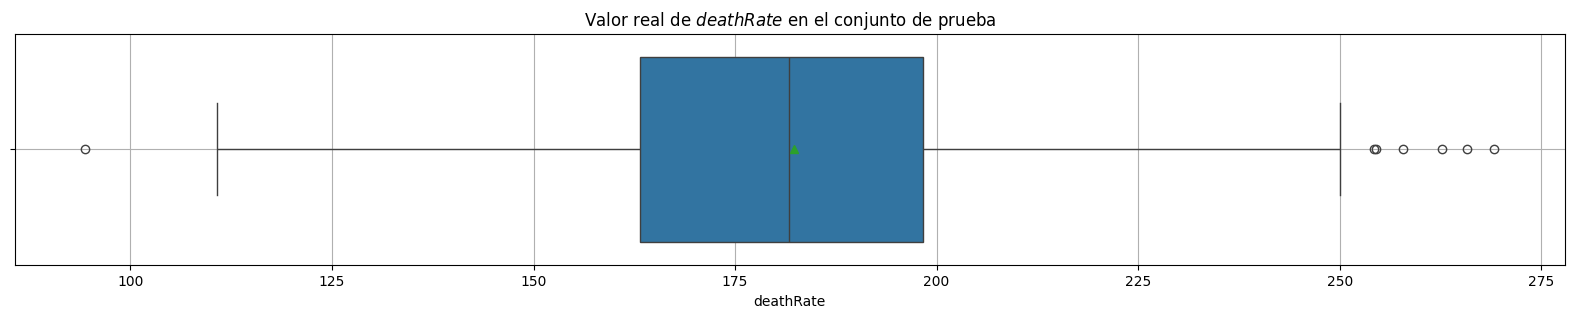

In [343]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{deathRate}$ en el conjunto de prueba")
plt.grid()
plt.show()

#### Cálculo de percentiles

In [344]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count    578.000000
mean     182.314879
std       26.289571
min       94.400000
25%      163.200000
50%      181.750000
75%      198.375000
99%      250.989000
max      269.200000
Name: deathRate, dtype: float64

###Implementación del pipeline con todas las transformaciones requeridas para la generación de predicciones, exportado en formato .joblib (Luis Plazas)

In [345]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [346]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

Se realizó la misma regresión que sin un pipeline, por ende el objetivo de es

#### Cálculo de Coeficientes de Regresión

In [347]:
pd.DataFrame({"columns": features2, "coef": pipe["model"].coef_})

columns       coef
0       avgDeathsPerYear  -0.442657
1          incidenceRate  10.098020
2         povertyPercent   2.194937
3            studyPerCap  -0.738174
4              MedianAge  -1.261648
5   PctMarriedHouseholds  -2.617134
6       AvgHouseholdSize  -0.161365
7           PctNoHS18_24  -1.877672
8             PctHS18_24   2.806327
9        PctBachDeg18_24  -0.579662
10          PctHS25_Over   1.062296
11     PctBachDeg25_Over  -5.941478
12             binnedInc   1.095056
13    PctPrivateCoverage  -4.841367
14              PctAsian  -0.554867
15          PctOtherRace  -2.097863
16             BirthRate  -0.662696

### Cálculo de punto de intercepción

In [348]:
pipe["model"].intercept_

180.26275964391692

In [349]:
y_train.mean(), y_test.mean()

(180.26275964391692, 182.31487889273356)

In [350]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipe.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipe.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipe.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipe.predict(X_test))))
print("\nR2:")
print("Train:", (r2_score(y_train, pipe.predict(X_train))))
print("Test:", (r2_score(y_test, pipe.predict(X_test))))


MAE:
Train: 14.01741995692328
Test: 14.97079768770349

RMSE:
Train: 19.124932824791617
Test: 19.274877917464668

R2:
Train: 0.45801235014716213
Test: 0.4615215875404516


In [351]:
errors = (pipe.predict(X_train[features2])-y_train).values

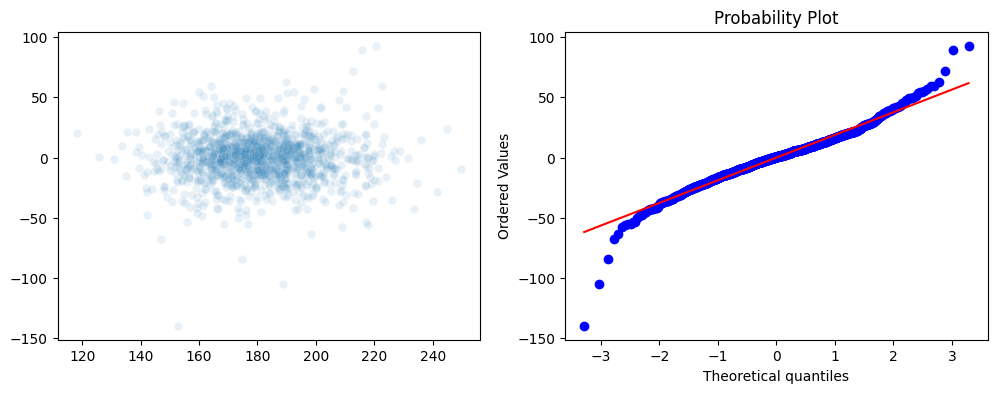

In [352]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipe.predict(X_train[features2]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Exportar el pipeline a formato .joblib

In [353]:
joblib.dump(pipe, 'pipe_joblib')

['pipe_joblib']

In [354]:
pipeline = joblib.load('pipe_joblib')

In [355]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))
print("\nR2:")
print("Train:", (r2_score(y_train, pipeline.predict(X_train))))
print("Test:", (r2_score(y_test, pipeline.predict(X_test))))


MAE:
Train: 14.01741995692328
Test: 14.97079768770349

RMSE:
Train: 19.124932824791617
Test: 19.274877917464668

R2:
Train: 0.45801235014716213
Test: 0.4615215875404516


### Exploración de los supuestos de regresión a partir del modelo construido (Santiago Pardo)

### Desarrollo de las transformaciones complementarias para cumplir con los supuestos de la regresión e interpretación de los coeficientes del modelo (Santiago Pardo)

### Presentación para CompuAlpes con resultados a nivel cuantitativo y cualitativo del mejor modelo construido (Felipe Rueda)

La presentación se encuentra adjunta con la entrega del informe

### Tablero de control construido para la visualización de resultados del modelo (Felipe Rueda)


### Archivo de predicciones sobre los datos de prueba en formato csv

Como este es un conjunto de datos de prueba, no se harán los mismos pasos de limpieza en vista a que se desean ver los resultados con otros tipos de datos, por ende sólo se utilizará la eliminación de columna con valores nulos y la eliminación de unos valores que impiden hacer un encoding de la variable binnedInc (que se incluyó dentro de los datos)

In [385]:
#Eliminación de atributos con valores nulos
df_test_att_clean = df_test.drop(['PctSomeCol18_24','PctPrivateCoverageAlone','PctEmployed16_Over'],axis=1)

#Eliminación de Valores de Atributo MedianAge - en este paso también se eliminan variables categóricas que no están incluidas dentro de los datos de prueba
df_test_ma = df_test_att_clean[df_test_att_clean['MedianAge']<70]

In [386]:
#Transformación de Datos Categóricos
df_test_cat_transformed = df_test_ma
df_test_cat_transformed['binnedInc'] = binnedIncEncoder.transform(df_test_cat_transformed['binnedInc'])
#No se realizará la transformación de Geography puesto que no se utilizó dentro del mejor modelo
features = ["avgDeathsPerYear", "incidenceRate", "povertyPercent",  "studyPerCap", "MedianAge", "PctMarriedHouseholds",  "AvgHouseholdSize" ,  "PctNoHS18_24", "PctHS18_24",  "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "binnedInc", "PctPrivateCoverage",   "PctAsian", "PctOtherRace",  "BirthRate"]
x_test2 = df_test_cat_transformed[features]

<ipython-input-386-93fcc2844775>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cat_transformed['binnedInc'] = binnedIncEncoder.transform(df_test_cat_transformed['binnedInc'])


Cargar pipeline y predecir

In [387]:
pipeline_loaded = load("pipe_joblib")

In [388]:
df_test_ma['deathRate'] = pipeline_loaded.predict(x_test2)

<ipython-input-388-a7f14557ee39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ma['deathRate'] = pipeline_loaded.predict(x_test2)


In [389]:
df_test_ma['binnedInc'] = df_test['binnedInc']

<ipython-input-389-b0df31529e85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ma['binnedInc'] = df_test['binnedInc']


Guardar PDF

In [391]:
#df_test_ma.to_csv('test_with_labels.csv',index=False,encoding='utf-8')